In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re

In [2]:
df=pd.read_csv('/home/diplopia/excel analyze/data/노블컴퍼니4_내역_2024092910.csv')
df=df.fillna(value=str(0))
df['후원시간'] = pd.to_datetime(df['후원시간'])
df['hour'] = df['후원시간'].dt.hour
df['hour'] = [str(i) for i in df['hour']]
df['day'] = df['후원시간'].dt.day
re_df = df[(df['참여BJ'] != '노블컴퍼니(대표BJ)') & (df['참여BJ'] != '콩승아') & (df['참여BJ'] != '0') & (df['후원하트']>=100)]


In [3]:
vip_list=[]
for i in re_df['후원 아이디(닉네임)']:
    vip_list.append(i.split('(')[1][:-1])

re_df['후원 아이디(닉네임)']=vip_list

/tmp/ipykernel_67218/8002336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_df['후원 아이디(닉네임)']=vip_list


In [4]:
re_df

,후원시간,후원 아이디(닉네임),후원하트,참여BJ,하트점수,기여도,기타,hour,day
1,2024-09-20 04:06:54,소은❤️내꺼,1010,솔이,1010,1010,0,4,20
2,2024-09-20 04:06:22,소은❤️내꺼,1010,솔이,1010,3030,수정,4,20
3,2024-09-20 04:05:48,소은❤️내꺼,1010,롬이,1010,1010,0,4,20
4,2024-09-20 04:05:24,소은❤️내꺼,1010,솔이,1010,1010,0,4,20
5,2024-09-20 04:05:10,소은❤️내꺼,1010,새리,1010,3030,수정,4,20
...,...,...,...,...,...,...,...,...,...
448,2024-09-19 14:55:45,수하한테반해버린ღ샤린,4136,수하,4136,8272,수정,14,19
449,2024-09-19 14:54:14,수하한테반해버린ღ샤린,999,수하,999,999,0,14,19
450,2024-09-19 14:52:23,수하한테반해버린ღ샤린,10000,수하,10000,30000,수정,14,19
451,2024-09-19 14:52:07,수하한테반해버린ღ샤린,3333,수하,3333,9999,수정,14,19


## 1. 출연자별 총 하트 합계 그래프

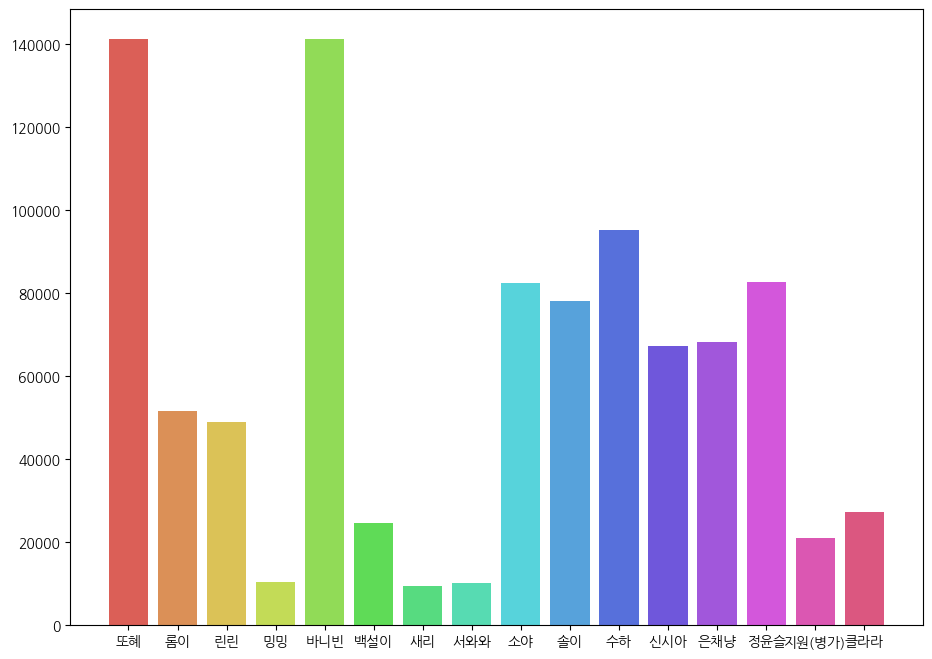

In [5]:
BJ_list = sorted(list(set(re_df['참여BJ'])))

BJ_hearts=[]
for i in BJ_list:
    hearts = re_df[re_df['참여BJ']==i]['후원하트'].sum()
    BJ_hearts.append(hearts)

# plt.rc('font',family='NanumGothic')
colors = sns.color_palette('hls',len(BJ_hearts))
plt.figure(figsize=(11,8))
plt.bar(BJ_list,BJ_hearts,color=colors)
plt.show()

### 1-1. 출연자가 받은 하트 통계

In [6]:
#1회차 BJ 평균
avg = sum(BJ_hearts)/len(BJ_list)
median = np.median(BJ_hearts)
max = np.max(BJ_hearts)
min = np.min(BJ_hearts)
lower25 = np.percentile(BJ_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(BJ_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  59988 
중위값 :  59373.0 
하위25% :  24556 
상위25% :  82393 
최대값 :  141381 
최솟값 :  9368


## 2. 시청자별 총 하트 하계 그래프

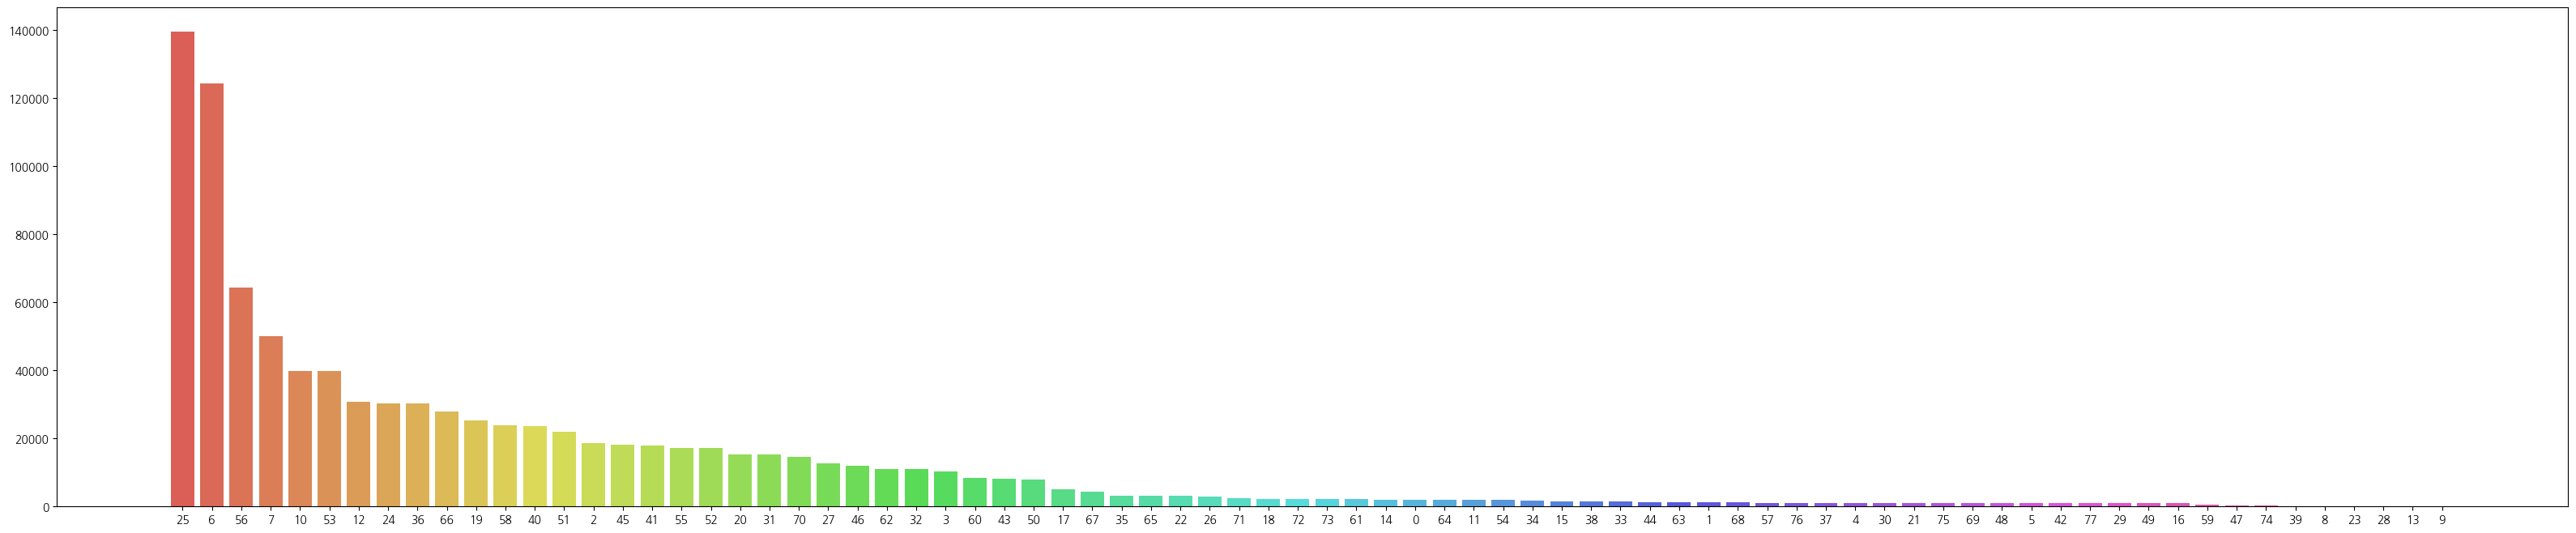

In [7]:
VIP_list = sorted(list(set(re_df['후원 아이디(닉네임)'])))

VIP_hearts=[]
for i in VIP_list:
    hearts = re_df[re_df['후원 아이디(닉네임)']==i]['후원하트'].sum()
    VIP_hearts.append(hearts)

new_df = pd.DataFrame({'ID':[str(i) for i in range(len(VIP_list))],
                        'vip_name':VIP_list,
                       'hearts':VIP_hearts})

sort_df = new_df.sort_values('hearts',ascending=False)
# for i,j in zip(VIP_list,VIP_hearts):
#     print(i,j)
# list(sort_df.index)
colors = sns.color_palette('hls',len(VIP_hearts))
plt.figure(figsize=(40,8))
plt.bar(sort_df['ID'],sort_df['hearts'],color=colors)
plt.show()
# sns.barplot(data=sort_df,x='ID',y='hearts',order=sort_df.sort_values('hearts'))

### 2-1. 시청자가 후원한 하트 통계

In [8]:
#1회차 시청자 평균
avg = sum(VIP_hearts)/len(VIP_list)
median = np.median(VIP_hearts)
max = np.max(VIP_hearts)
min = np.min(VIP_hearts)
lower25 = np.percentile(VIP_hearts,25,interpolation = 'nearest')
higher25 = np.percentile(VIP_hearts,75, interpolation = 'nearest')
print('평균 : ',round(avg), '\n중위값 : ',median, '\n하위25% : ',lower25, '\n상위25% : ',higher25, '\n최대값 : ',max, '\n최솟값 : ',min)

평균 :  12305 
중위값 :  2223.0 
하위25% :  1088 
상위25% :  15389 
최대값 :  139675 
최솟값 :  100


### 2-2. 후원을 많이한 시청자 Rank17

In [9]:
sort_df[:17]

,ID,vip_name,hearts
25,25,✦백야✦™,139675
6,6,ZO지GO,124391
56,56,수하한테반해버린ღ샤린,64397
7,7,[솔플단][류류]큐캬캬,50000
10,10,ෆ젖문가ෆ,39944
53,53,소은❤️내꺼,39795
12,12,ღ롬이ღ아크,30779
24,24,✦✦⭐SBG⭐쿠마☆✦✦,30289
36,36,⭐금지™,30281
66,66,재벌박회장,28002


In [10]:
time_df = re_df.groupby(['day','hour'])['후원하트'].sum().reset_index()
# time_df['hour']=[str(i) for i in time_df['hour']]


In [11]:
time_df

,day,hour,후원하트
0,19,14,24869
1,19,15,55732
2,19,16,25492
3,19,17,82191
4,19,18,77831
5,19,19,29862
6,19,20,102897
7,19,21,100357
8,19,22,94533
9,19,23,53584


## 3. 시간별 총 하트 합계 그래프

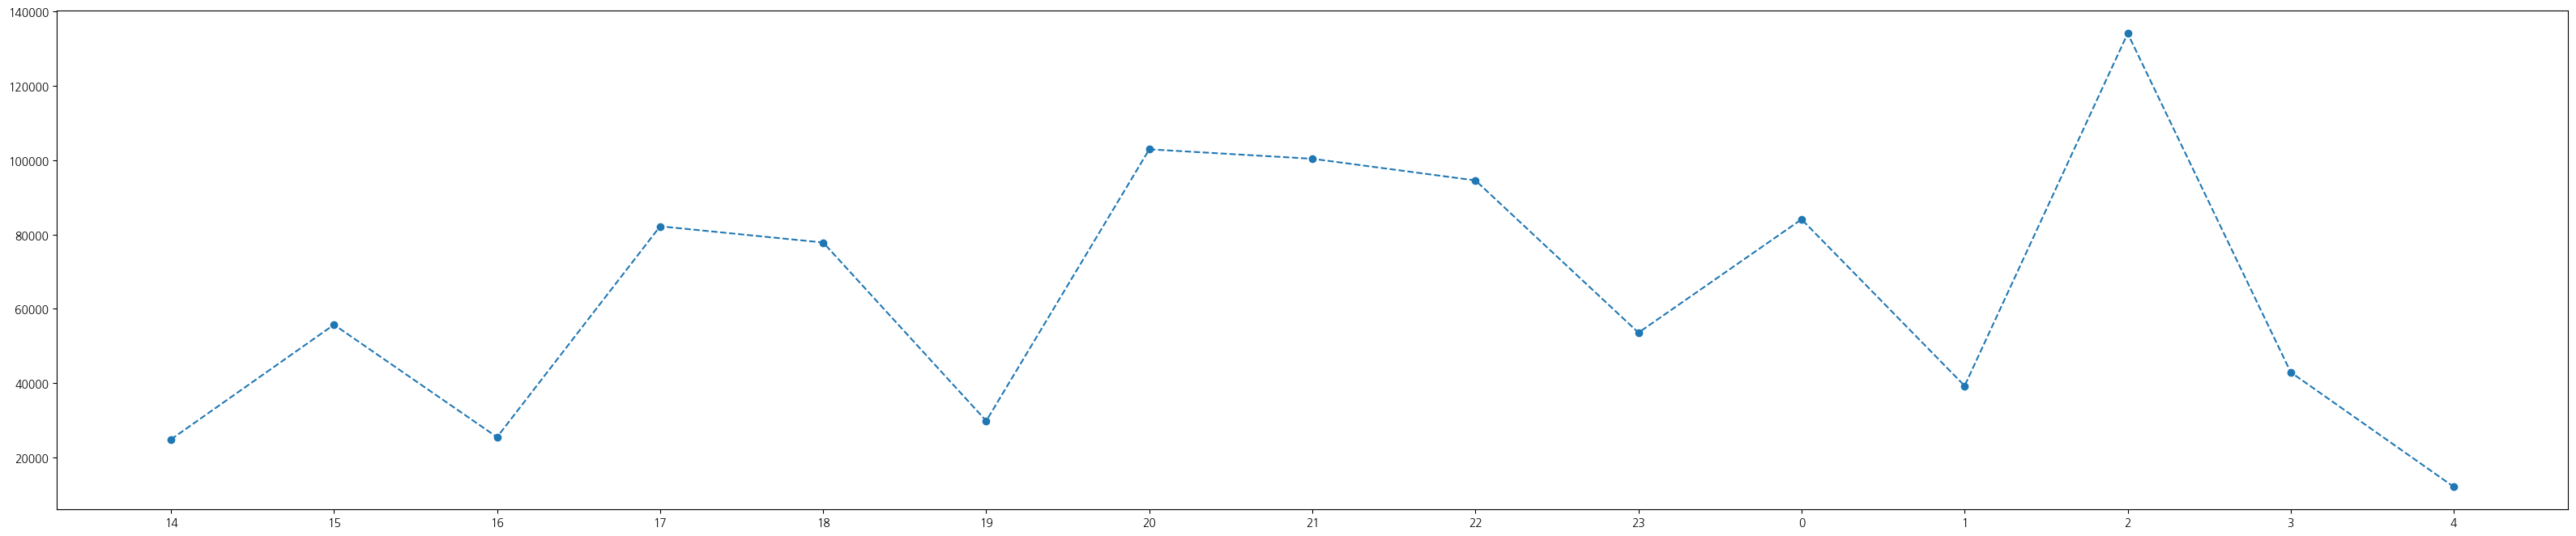

In [12]:
plt.figure(figsize=(40,8))
plt.plot(time_df['hour'],time_df['후원하트'],linestyle='--',marker='o')
plt.show()

## 4. 출연자별 하트 시계열 그래프

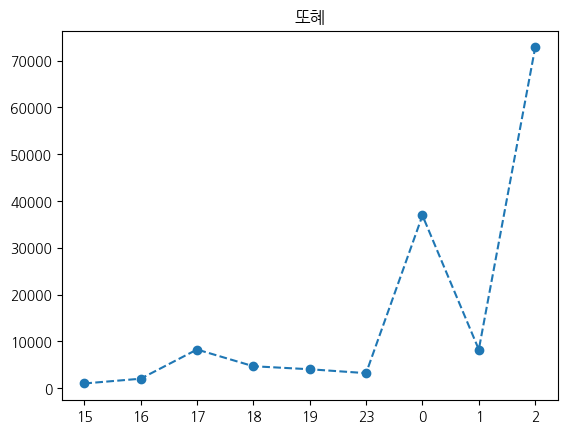

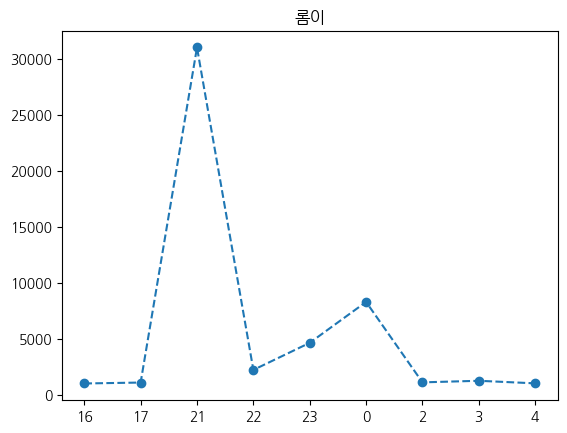

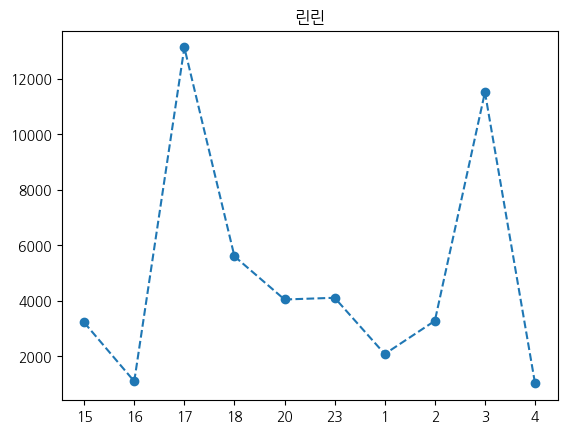

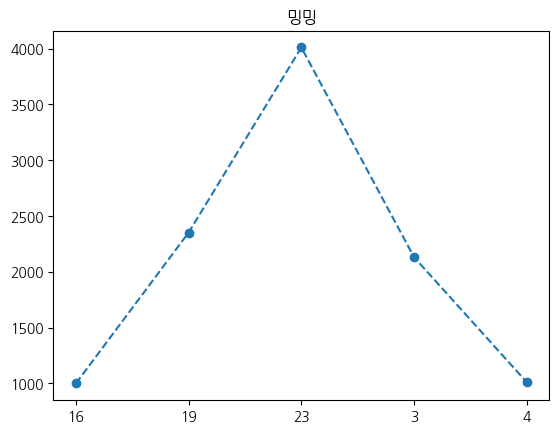

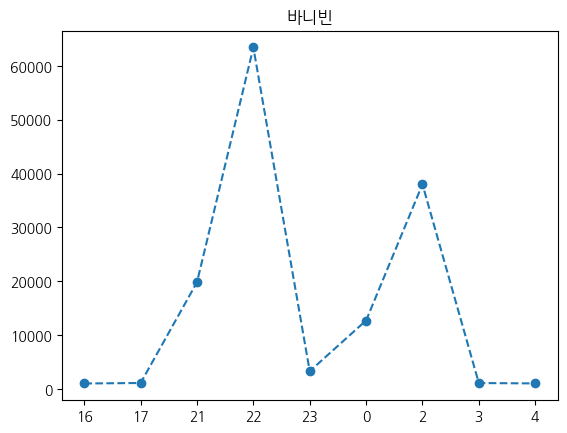

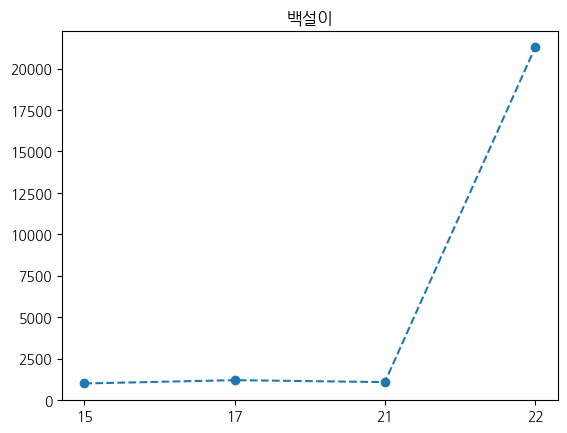

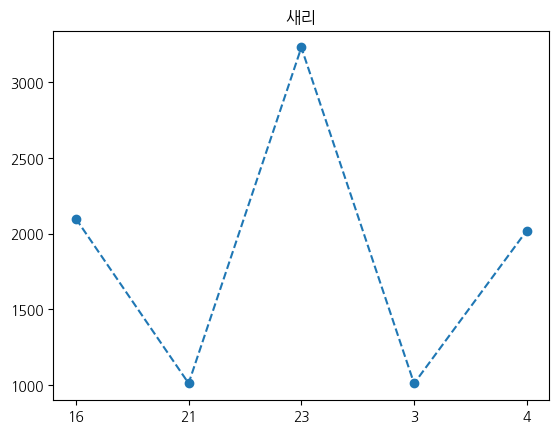

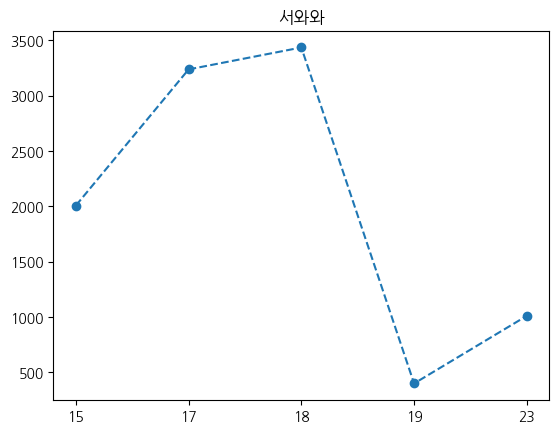

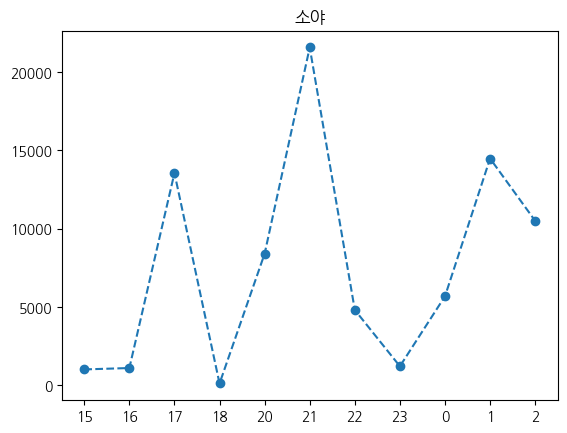

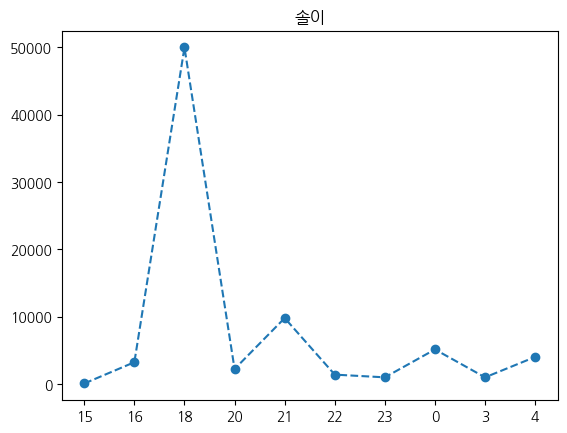

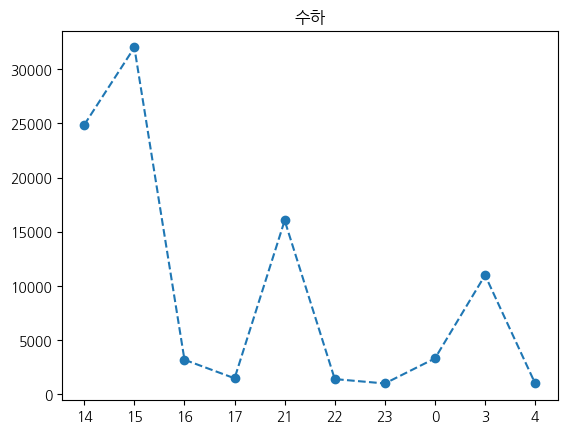

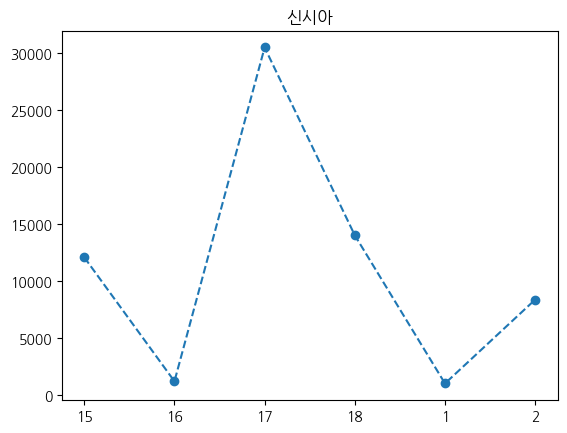

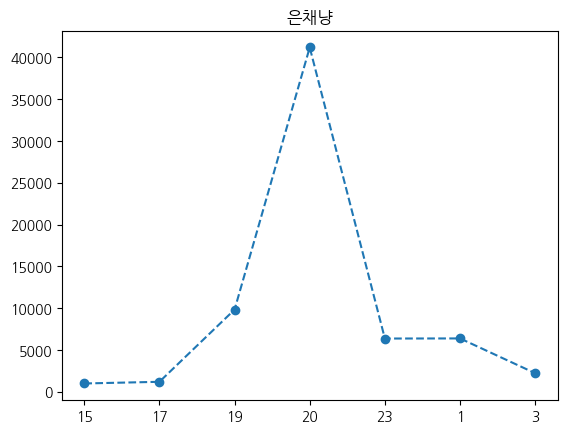

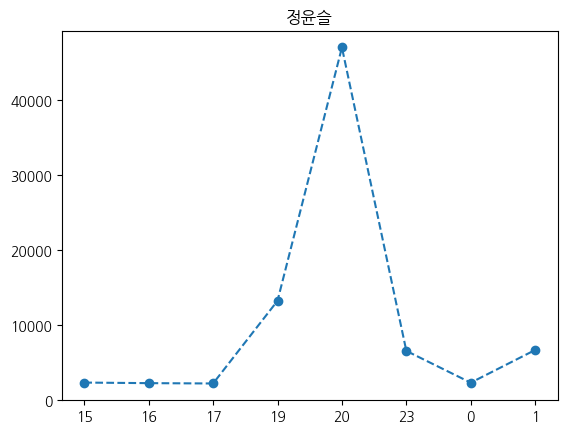

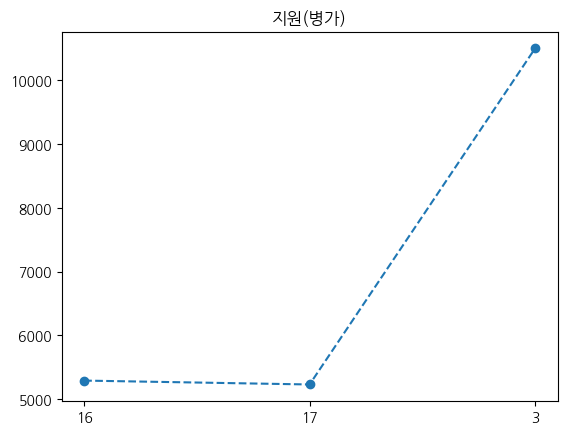

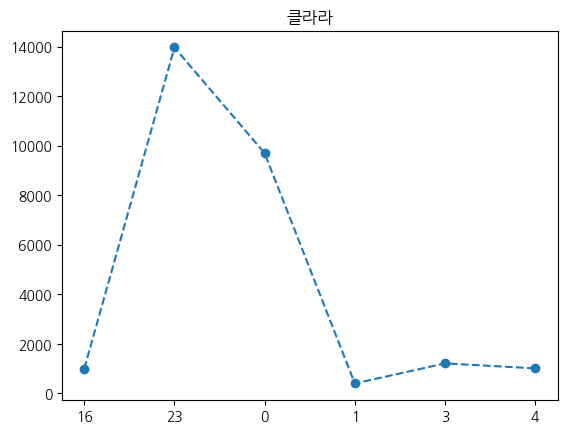

In [13]:
for i in BJ_list:
    BJ_time_df = re_df[re_df['참여BJ']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    plt.plot(BJ_time_df['hour'],BJ_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

## 5. 시청자별 하트후원 시계열 그래프

*⛧★⭐동탄큰손➷


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


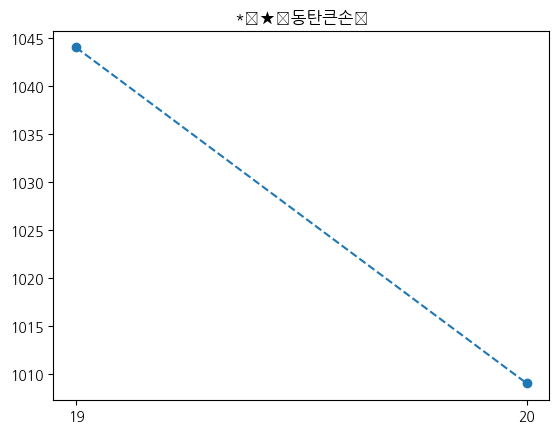

5타쿠6타쿠7타쿠8타쿠


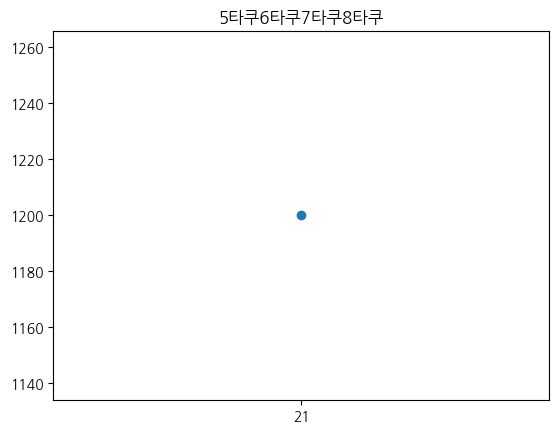

NameD악마분코


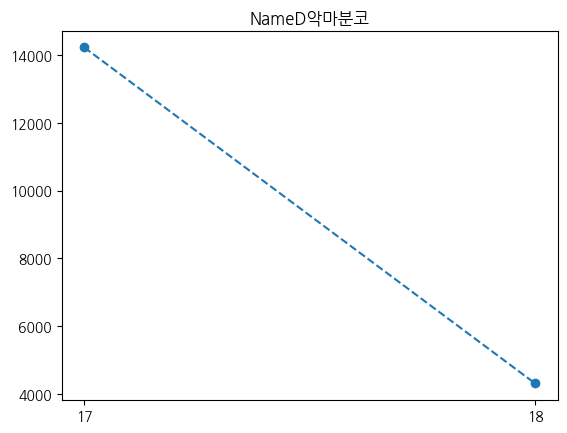

ON⁀➷⭐OFF


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8256 (\N{CHARACTER TIE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


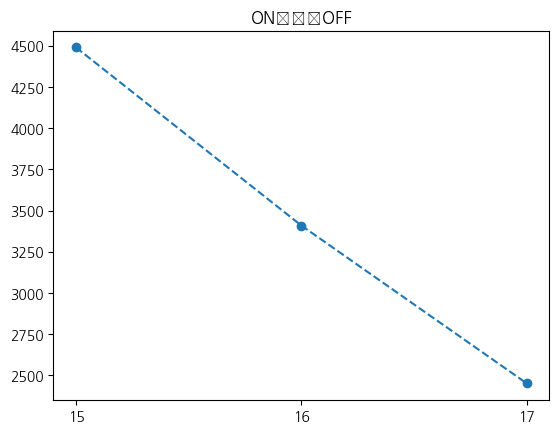

RSCIBY


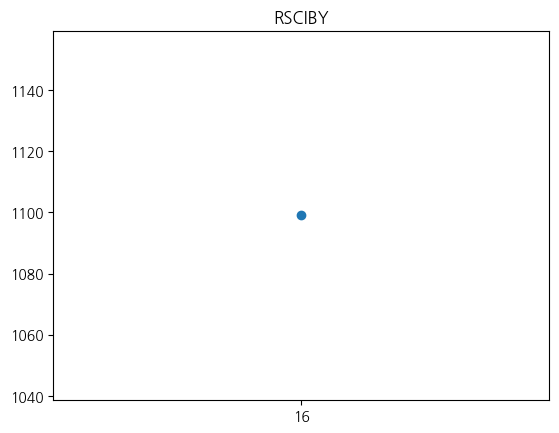

Z1nu


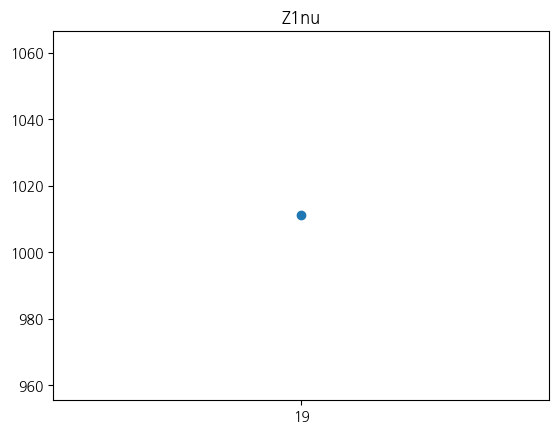

ZO지GO


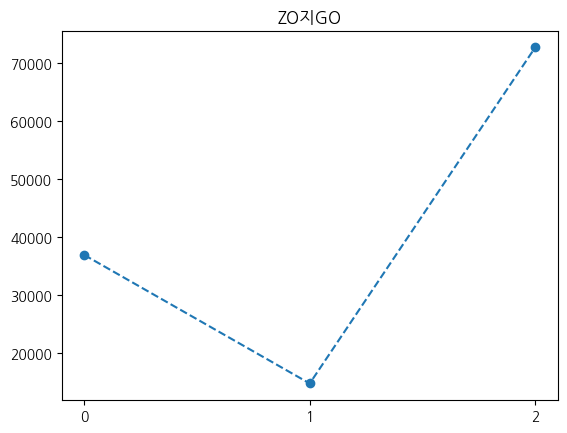

[솔플단][류류]큐캬캬


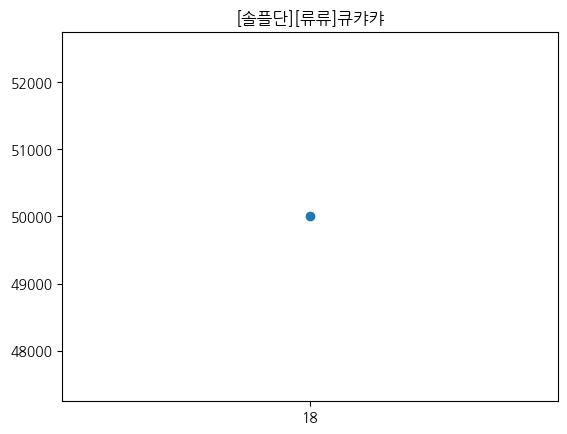

ejrdndk0


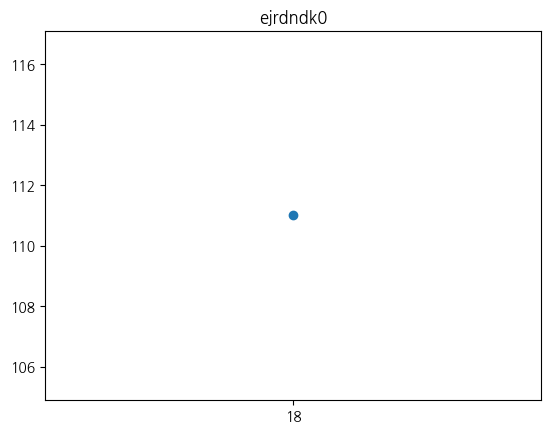

ෆ김유리네똥개플래ෆ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


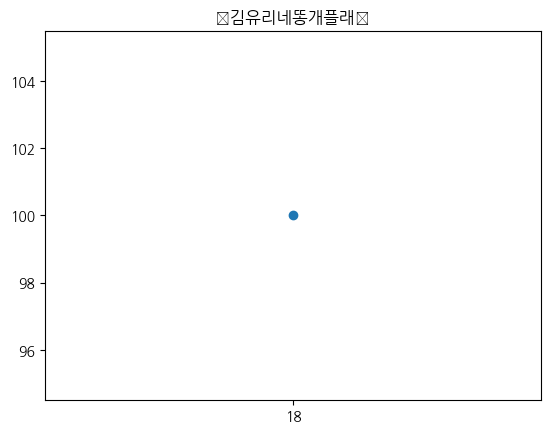

ෆ젖문가ෆ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)


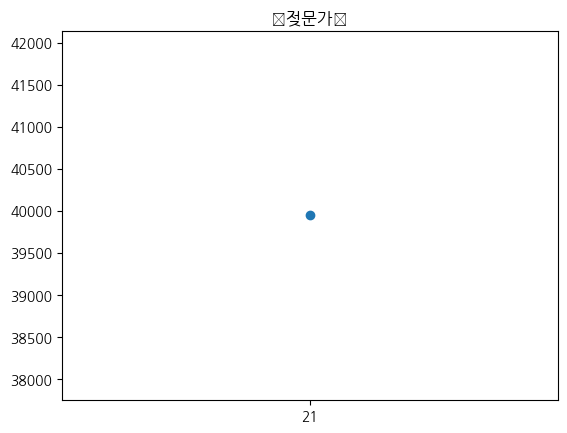

ෆ페라리❥


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


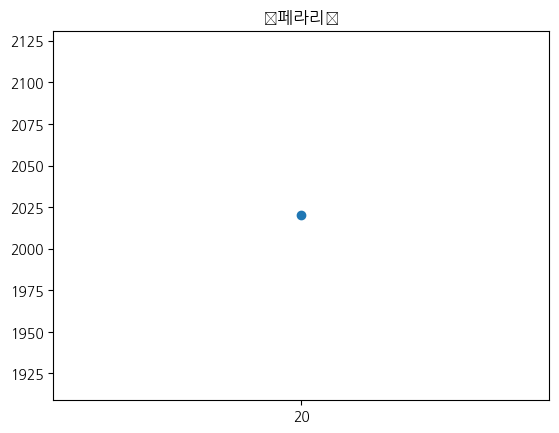

ღ롬이ღ아크


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


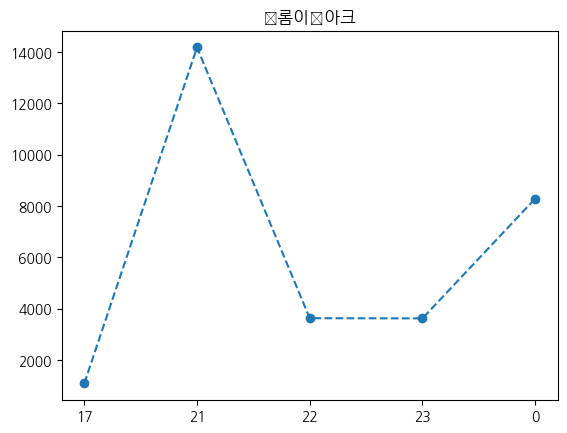

ღ린린ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


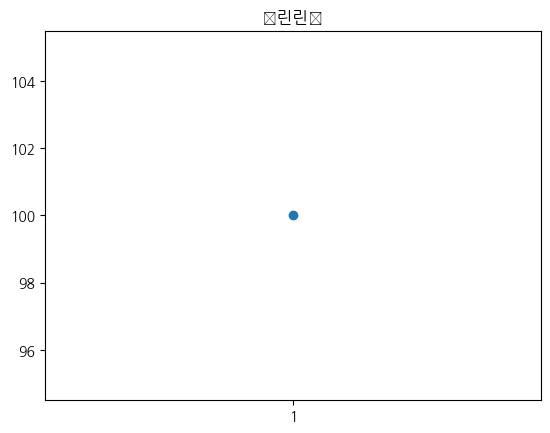

ღ린린ღ⭐클링크⭐


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


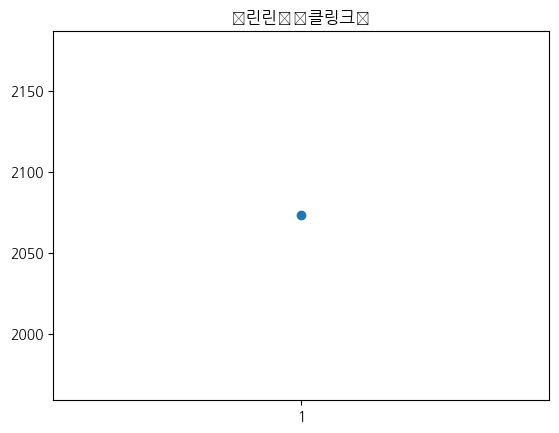

ღ몰랑ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


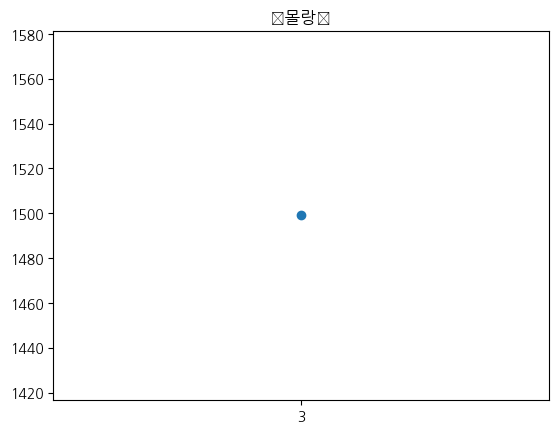

ღ민냥이ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


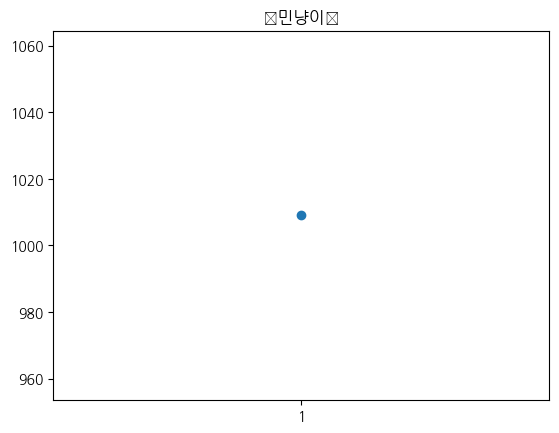

ღ버슬꺼버슬까ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


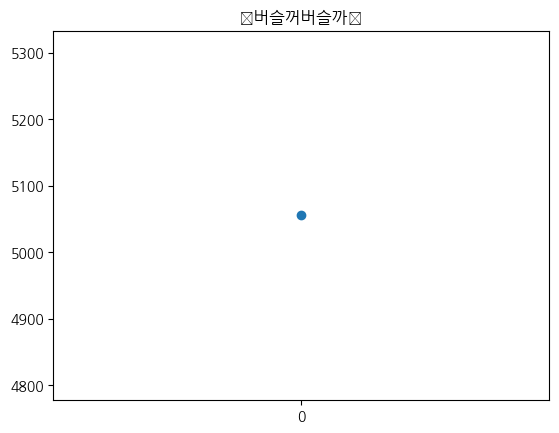

ღ시아ღTT


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


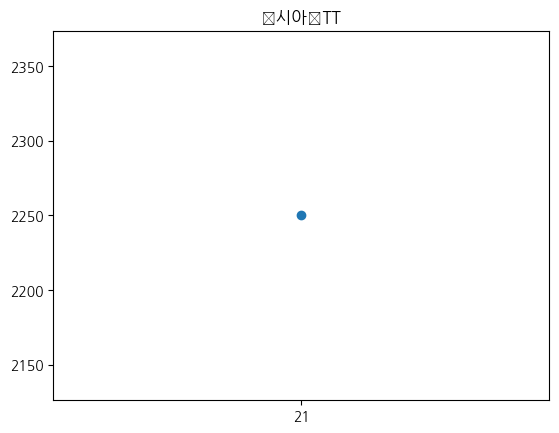

ღ시안ღ날아라ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


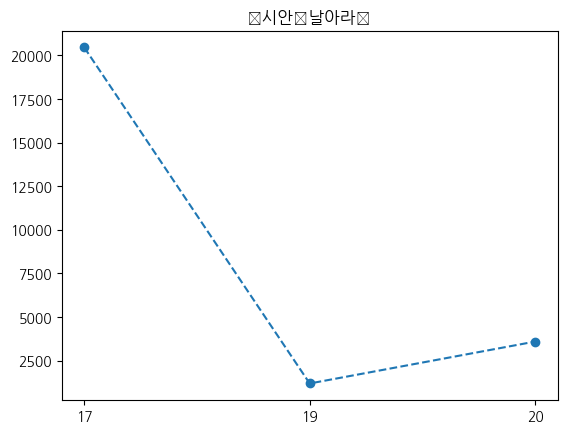

♥BOHEM


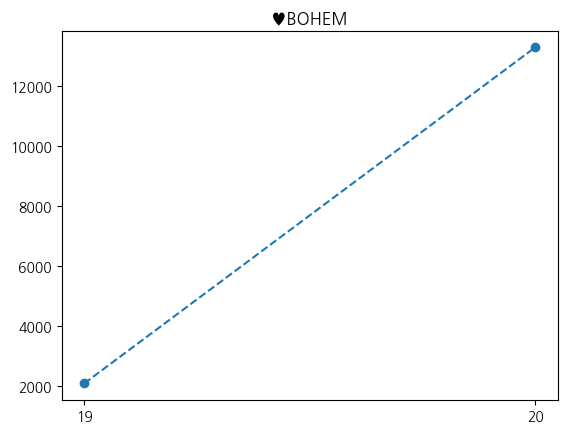

♬Bj가수박민규ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


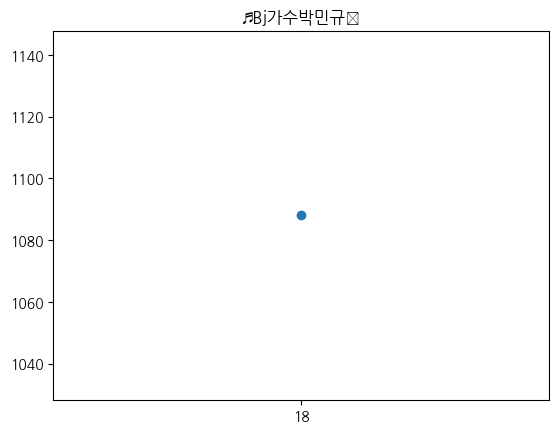

⛧오타쿠⛧


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


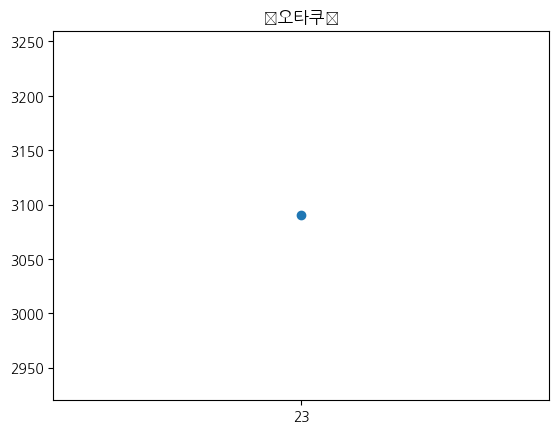

⛧혹등고래


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9959 (\N{INVERTED PENTAGRAM}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


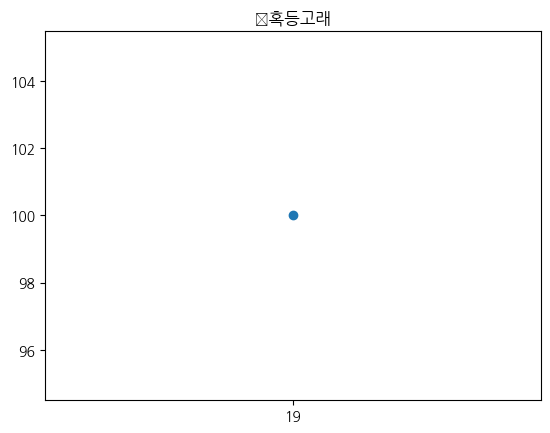

✦✦⭐SBG⭐쿠마☆✦✦


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10022 (\N{BLACK FOUR POINTED STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


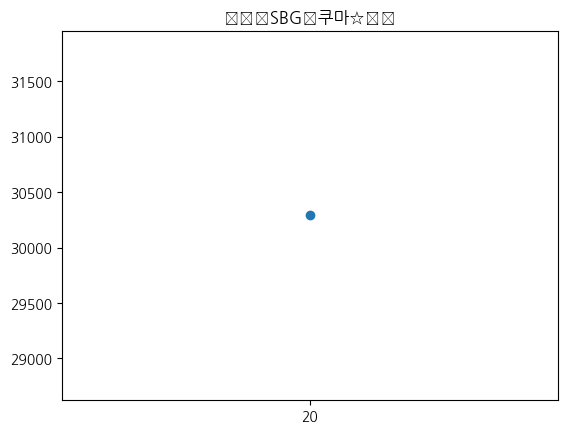

✦백야✦™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10022 (\N{BLACK FOUR POINTED STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


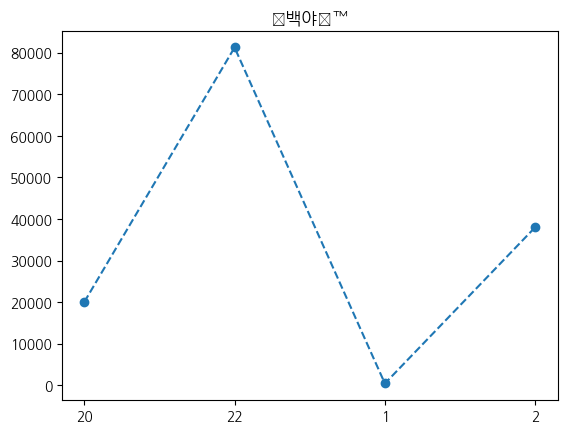

✧엽전✧


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10023 (\N{WHITE FOUR POINTED STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


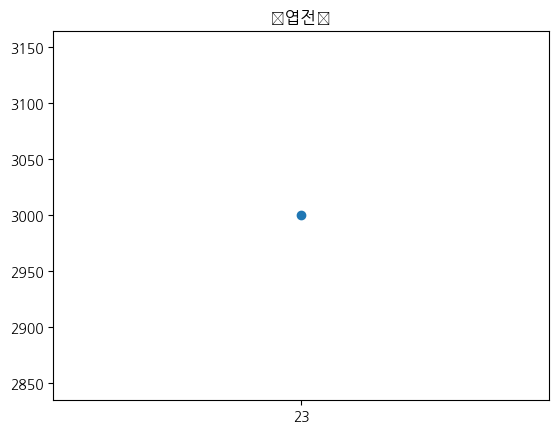

✨~뇌졸증~✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


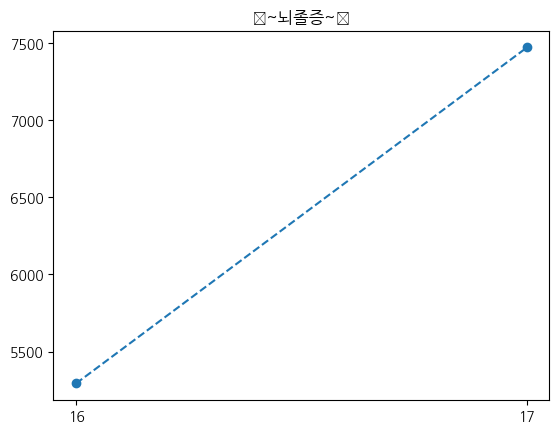

✨꿀♬선하❤️Milk✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


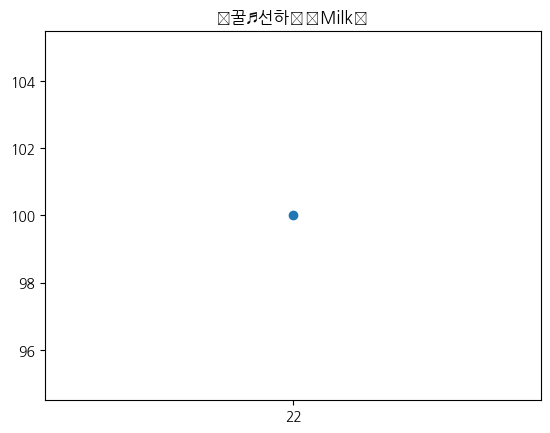

✨맛있는왕씨✨


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


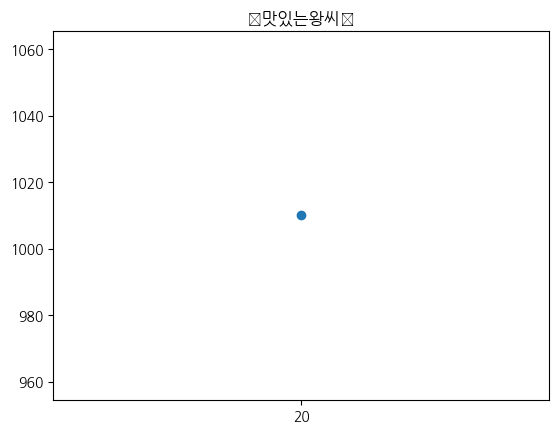

✨사장™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


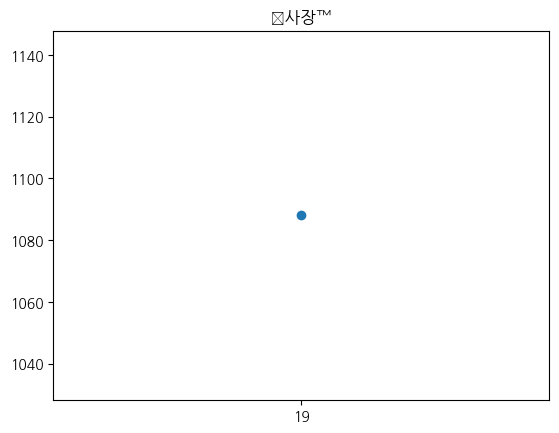

✿소울


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


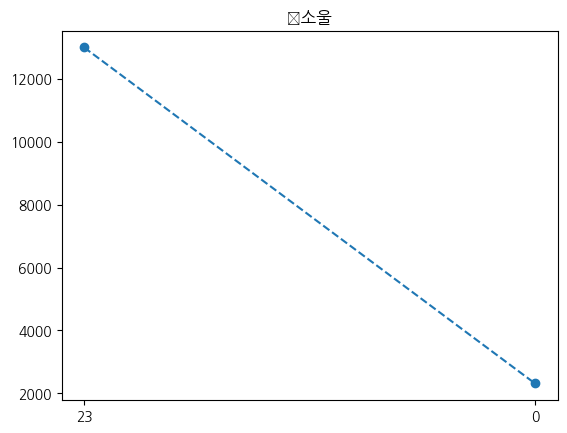

✿신시아✿⁀➷ෆ샤코™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8256 (\N{CHARACTER TIE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3526 (\N{SINHALA LETTER FAYANNA}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.p

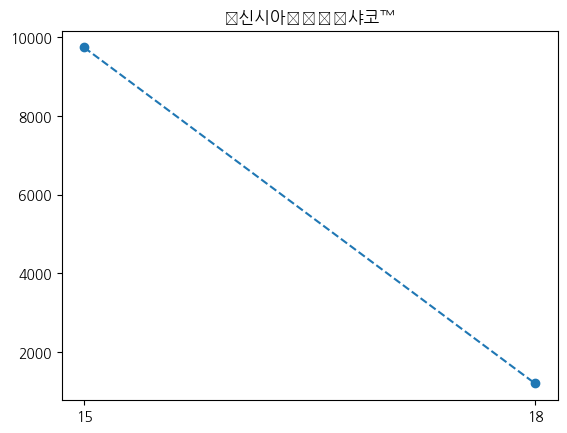

❤️벤자민❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


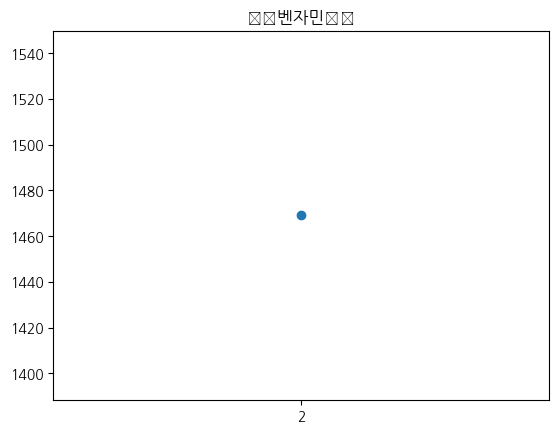

❤️벤자민❤️광마™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


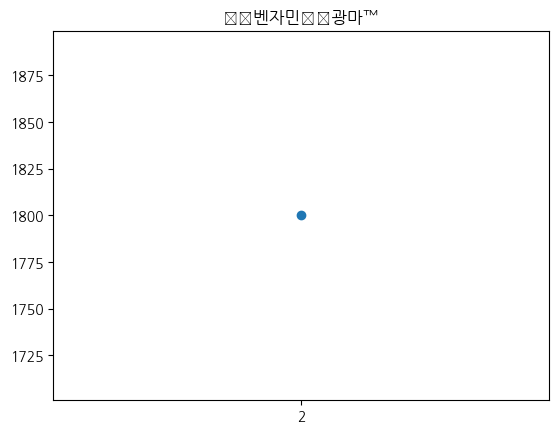

❥새나⚡에너지


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


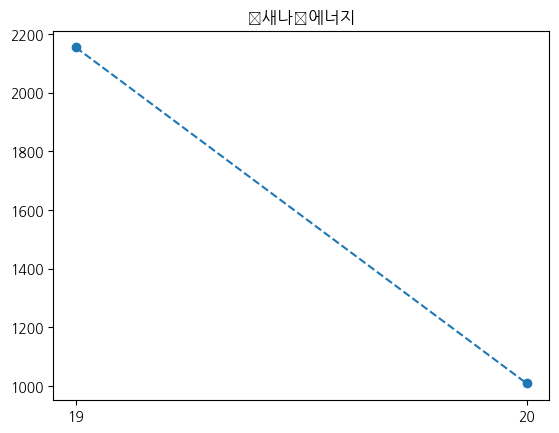

⭐금지™


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


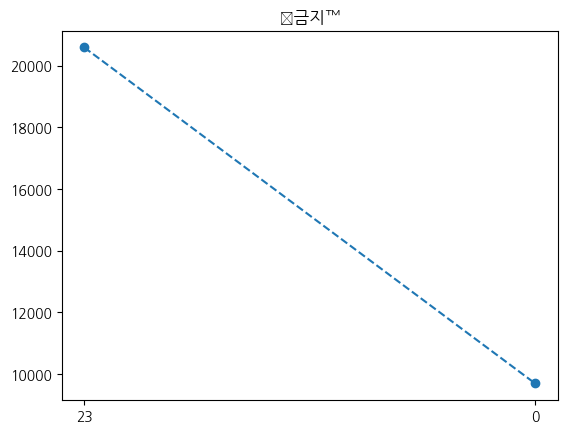

⭐헬레빗⭐


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


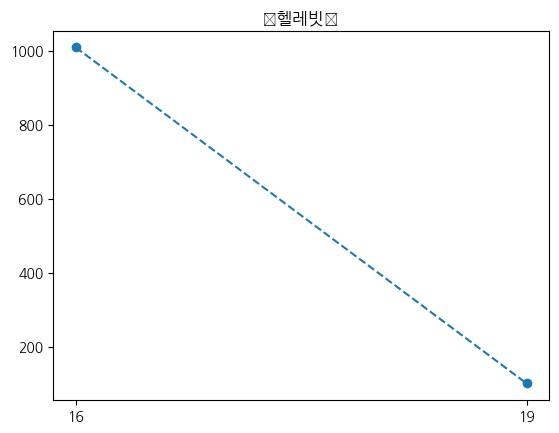

나오PANDA


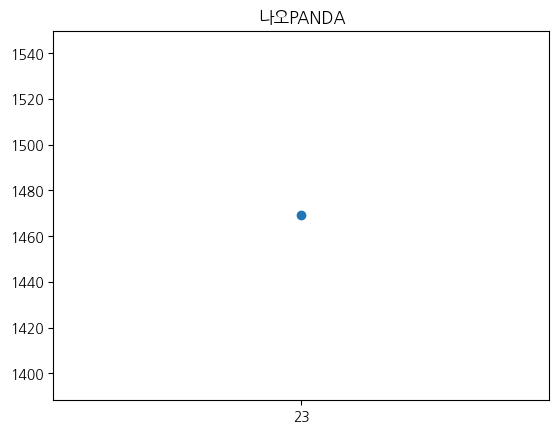

나이키매니아문래


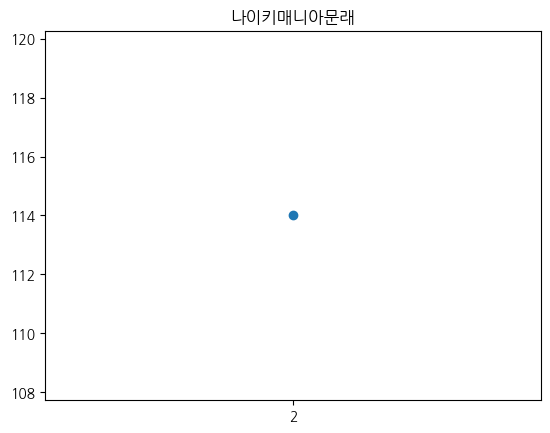

눈먼천사


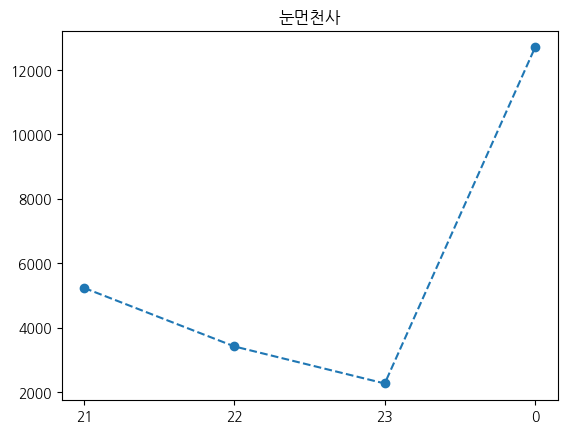

드렁큰베어⚘


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9880 (\N{FLOWER}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


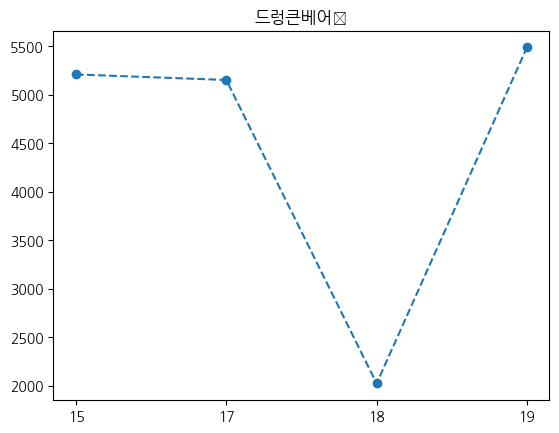

매력넘침❤️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


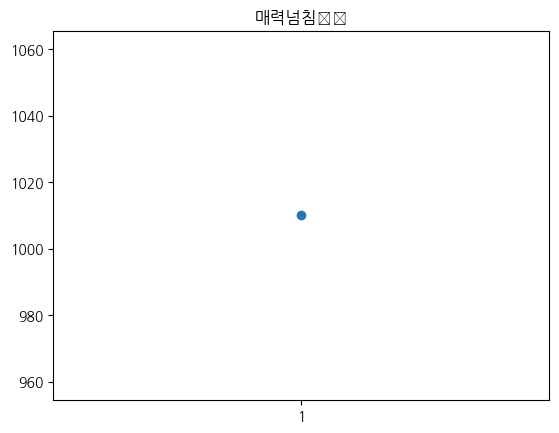

몰래먹어야존맛


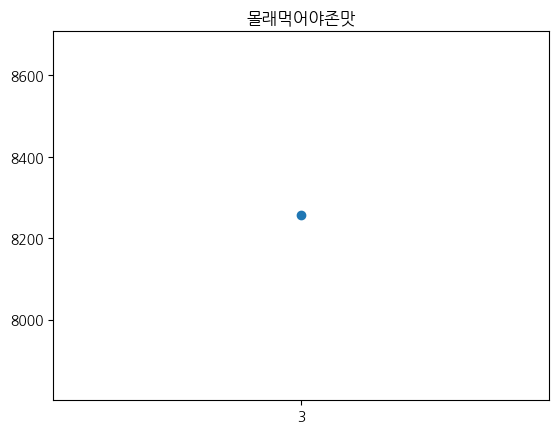

뭉개뭉개솜사탕


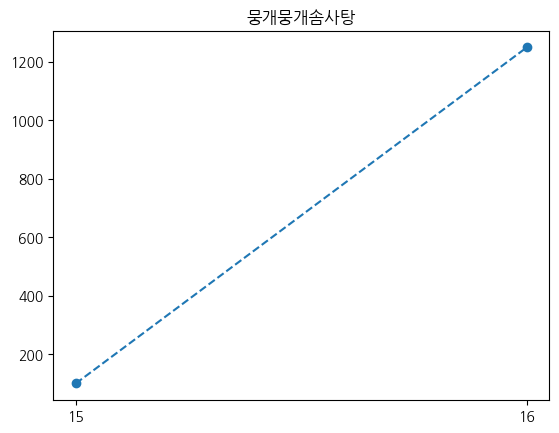

미키™


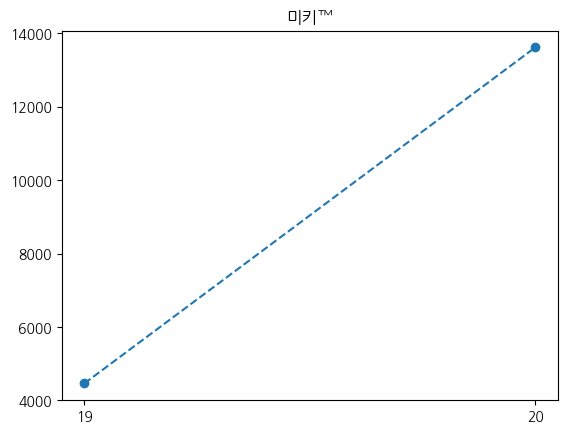

벤틀리23년식♠️신형♠️


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


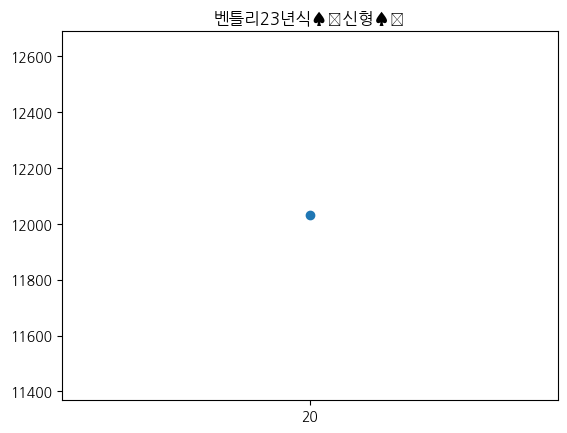

보호자은새❤️금쪽이띠바ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


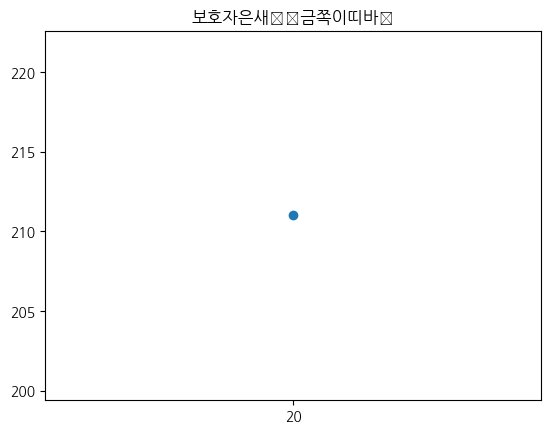

새리와따핑사조위


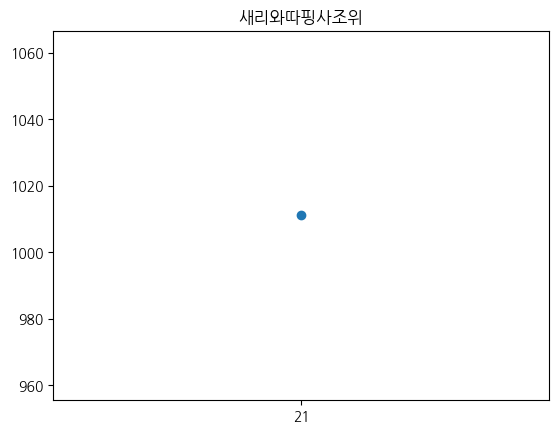

새벽[납작만두단]


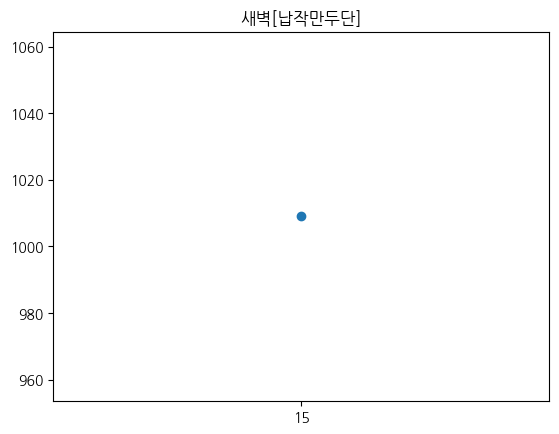

소민♡학이오빠♡


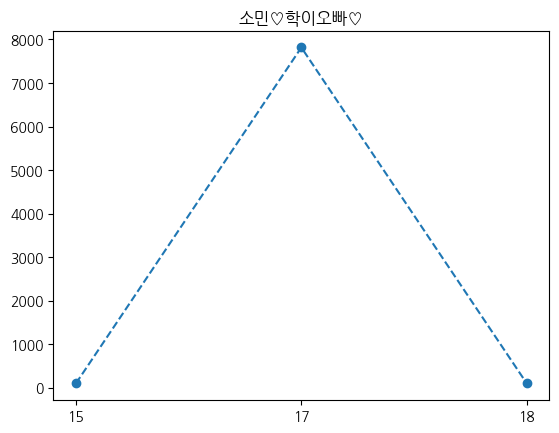

소야♡Push푸시


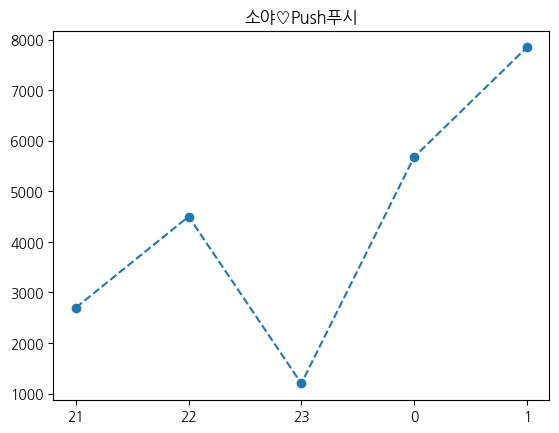

소야❤️푸시


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


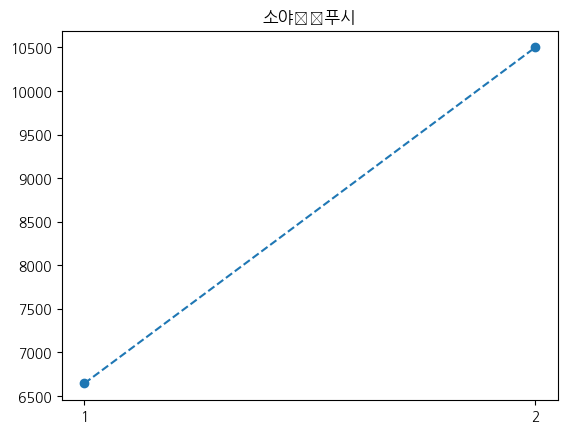

소은❤️내꺼


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


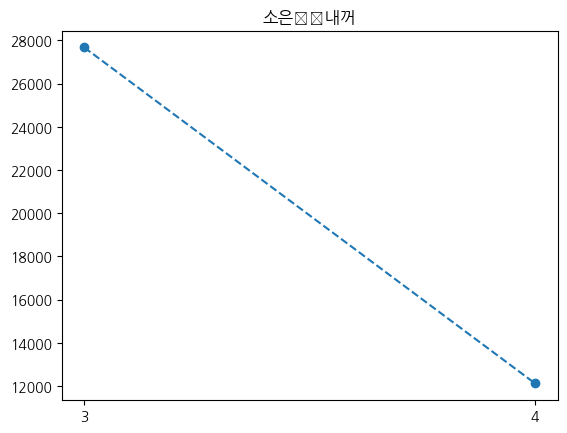

수하♡샤린


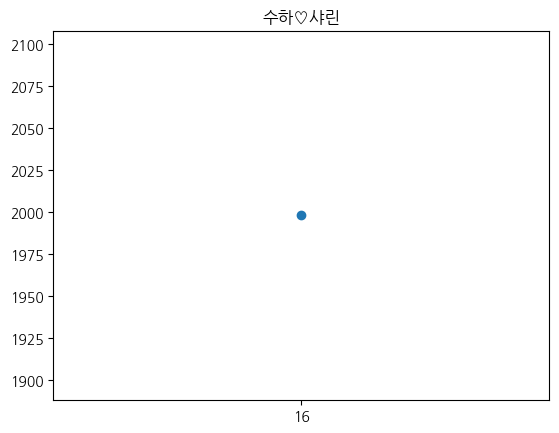

수하의충성스런개


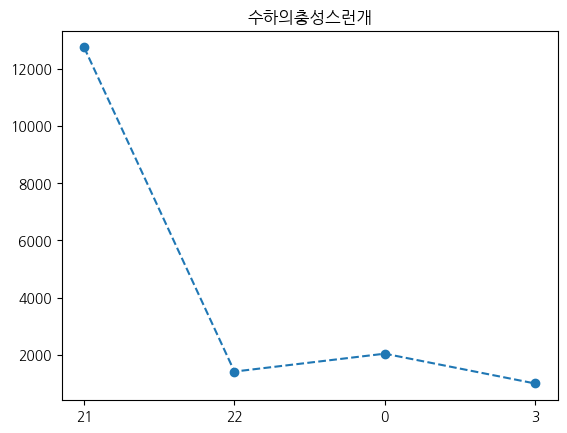

수하한테반해버린ღ샤린


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


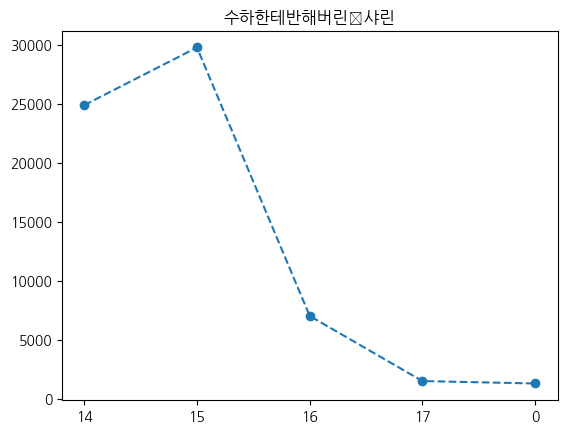

슈발지원❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


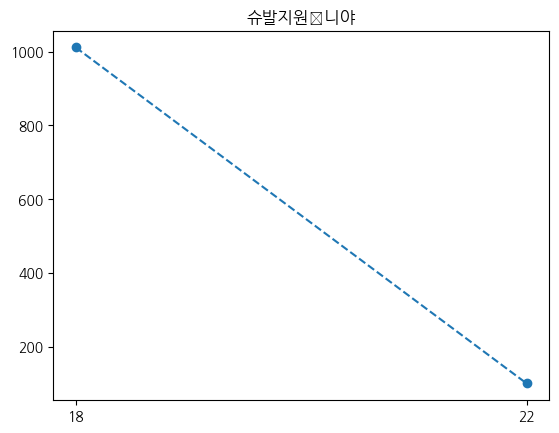

시원한똥줄기


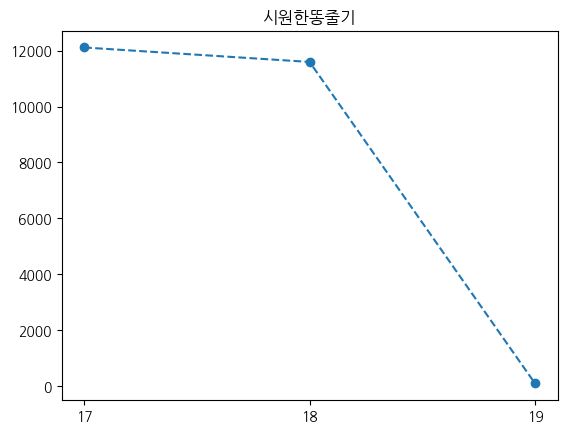

야➳나그지야❥니야


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


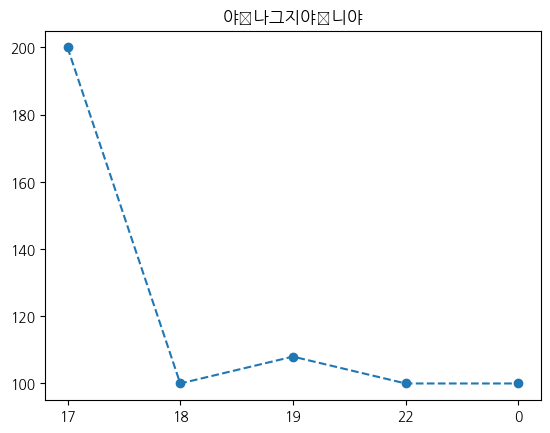

야얼마면줄까


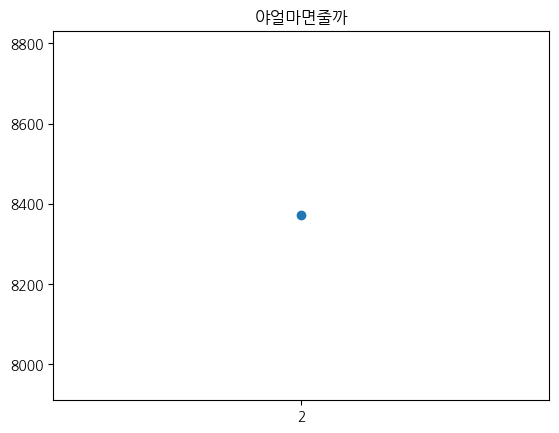

육개장라면


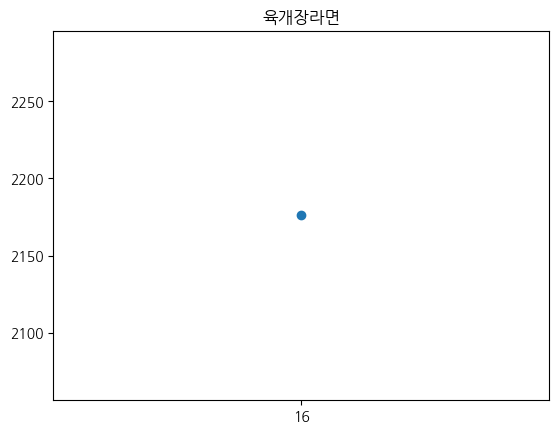

윤슬❤️그지별루다*⁀➷ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8256 (\N{CHARACTER TIE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtool

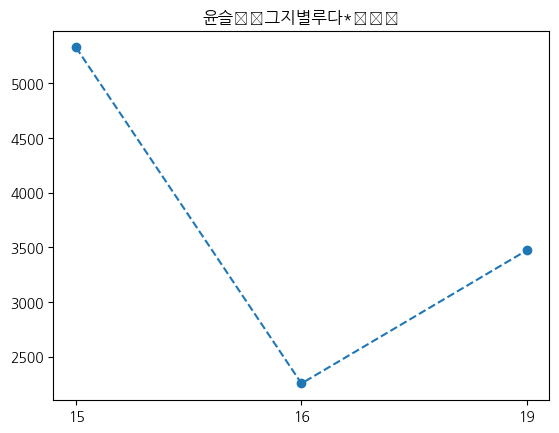

윤지효❥


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


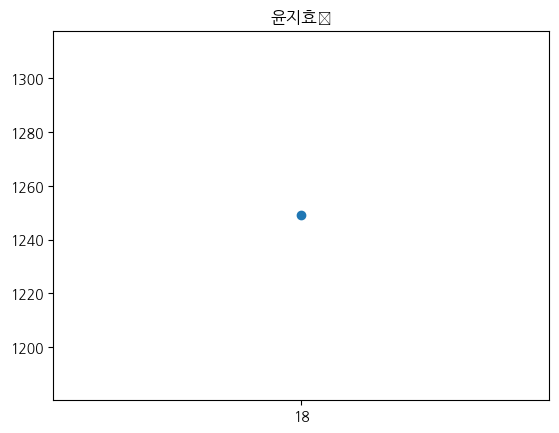

은채궁에하트터는김루팡


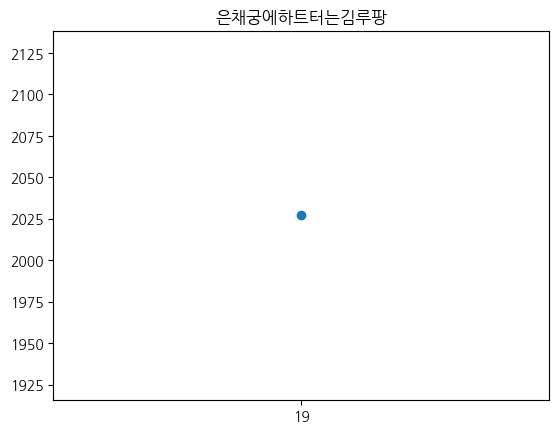

은채만의연료유


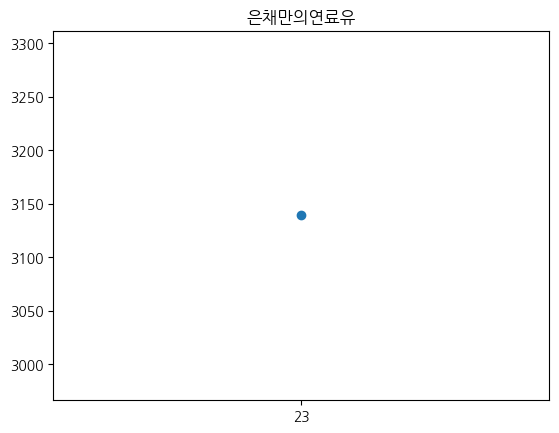

재벌박회장


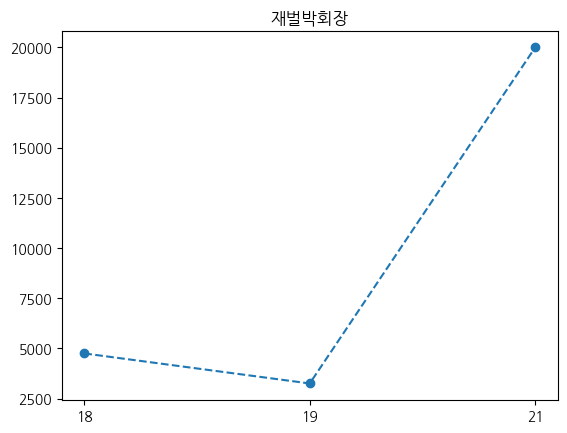

정윤슬➳❥독사단지갑


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10163 (\N{WHITE-FEATHERED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


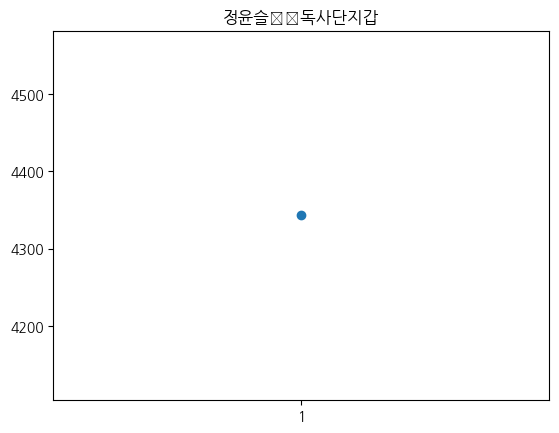

지원ღ


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


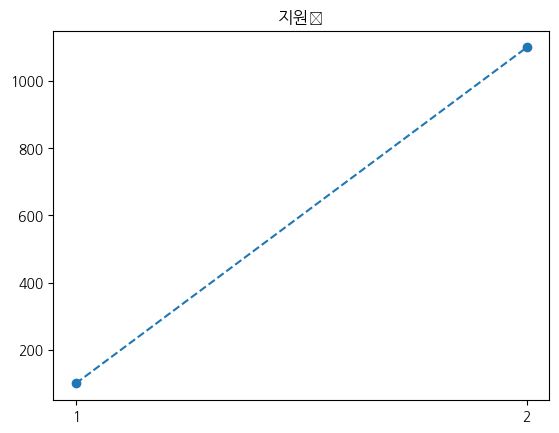

짱구팬밍


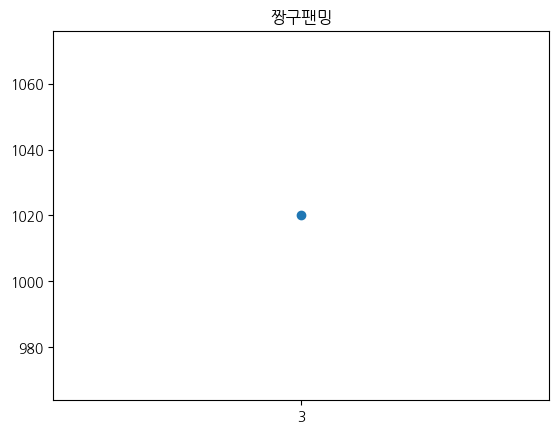

쫄보b


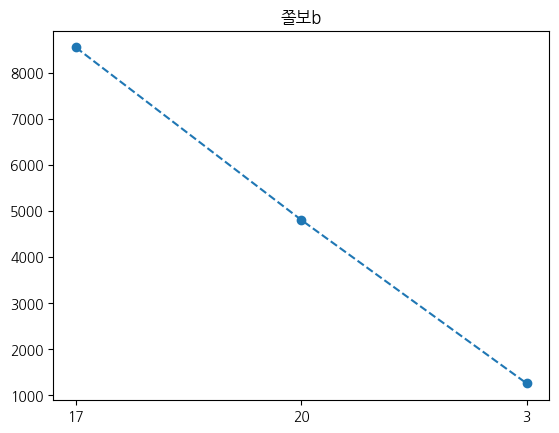

테라카쓰


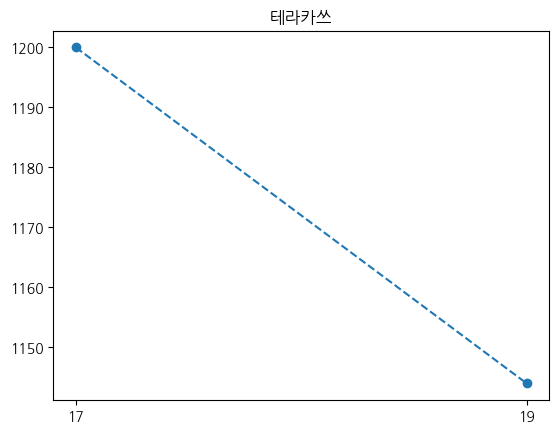

하꼬족고아깨리네⚡머네로


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


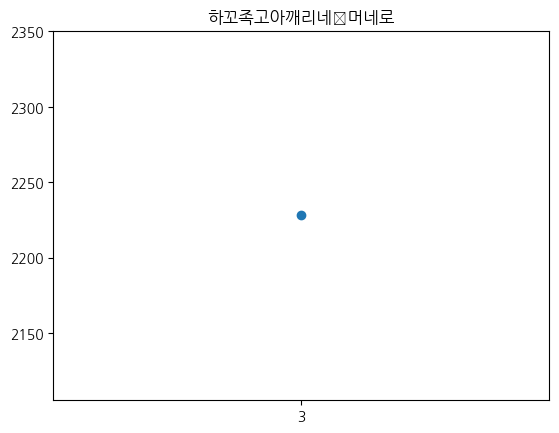

한가을ღ유깡


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4326 (\N{GEORGIAN LETTER GHAN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


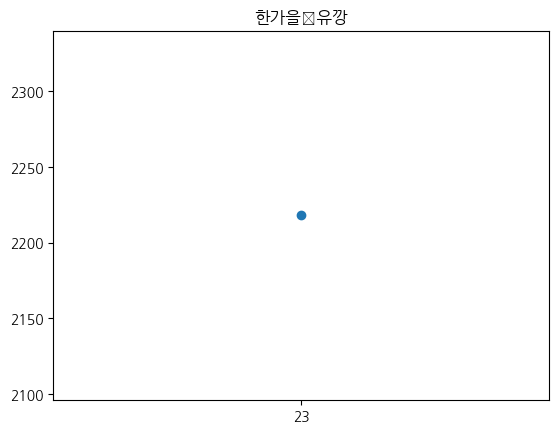

한지우☾윤지효➷❥강백호


/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9790 (\N{LAST QUARTER MOON}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10167 (\N{HEAVY BLACK-FEATHERED SOUTH EAST ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/home/diplopia/miniconda3/envs/excel/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10085 (\N{ROTATED HEAVY BLACK HEART BULLET}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


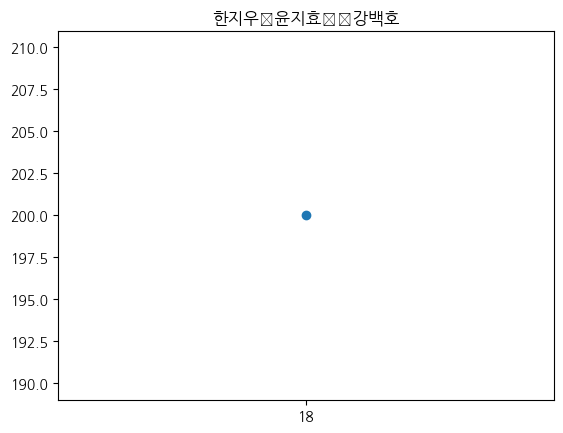

현생가용


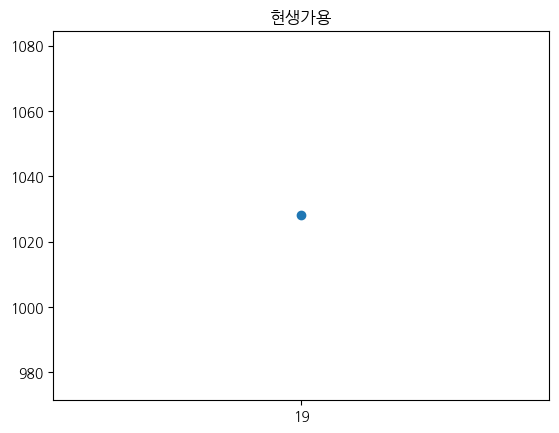

현생간농부


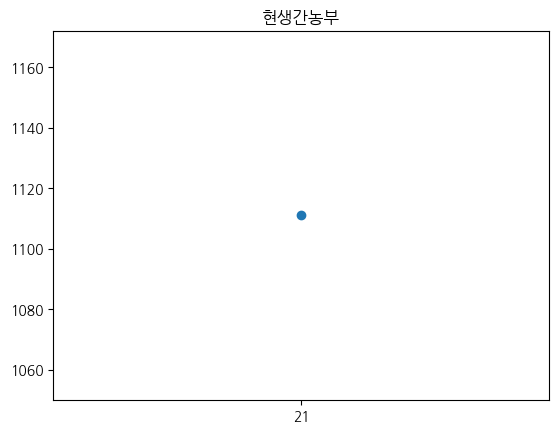

후니㉦


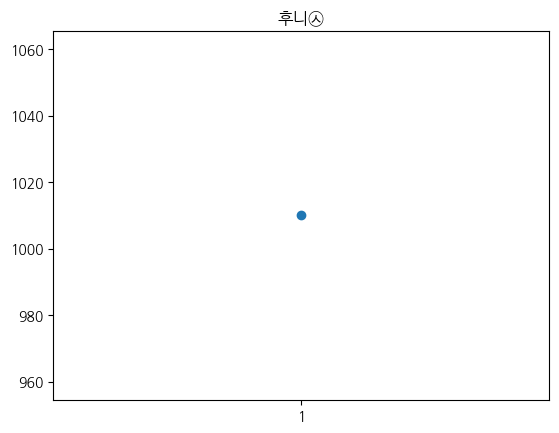

In [14]:
for i in VIP_list:
    VIP_time_df = re_df[re_df['후원 아이디(닉네임)']==i].groupby(['day','hour'])['후원하트'].sum().reset_index()
    print(i)
    plt.plot(VIP_time_df['hour'],VIP_time_df['후원하트'],linestyle='--',marker='o')
    plt.title(i)
    plt.show()

In [15]:
re_df2 = re_df.set_index('후원시간')

In [16]:
df_10m = pd.DataFrame()

df_10m['min'] = re_df2.후원하트.resample('10T').min()
df_10m['max'] = re_df2.후원하트.resample('10T').max()
df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
df_10m['median'] = re_df2.후원하트.resample('10T').median()
df_10m['sum'] = re_df2.후원하트.resample('10T').sum()

/tmp/ipykernel_67218/916355910.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['min'] = re_df2.후원하트.resample('10T').min()
/tmp/ipykernel_67218/916355910.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['max'] = re_df2.후원하트.resample('10T').max()
/tmp/ipykernel_67218/916355910.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['mean'] = re_df2.후원하트.resample('10T').mean()
/tmp/ipykernel_67218/916355910.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['median'] = re_df2.후원하트.resample('10T').median()
/tmp/ipykernel_67218/916355910.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10m['sum'] = re_df2.후원하트.resample('10T').sum()


In [17]:
df_10m

,min,max,mean,median,sum
후원시간,,,,,
2024-09-19 14:50:00,999.0,10000.0,4144.833333,3734.5,24869
2024-09-19 15:00:00,1088.0,10000.0,5544.000000,5544.0,11088
2024-09-19 15:10:00,1028.0,1200.0,1113.000000,1111.0,3339
2024-09-19 15:20:00,100.0,3333.0,1716.500000,1716.5,3433
2024-09-19 15:30:00,1011.0,2696.0,1269.900000,1141.0,12699
...,...,...,...,...,...
2024-09-20 03:20:00,NaN,NaN,NaN,NaN,0
2024-09-20 03:30:00,1020.0,1020.0,1020.000000,1020.0,1020
2024-09-20 03:40:00,500.0,10000.0,5374.750000,5499.5,21499


## 6. 10분 집계당 시계열 통계 그래프

min


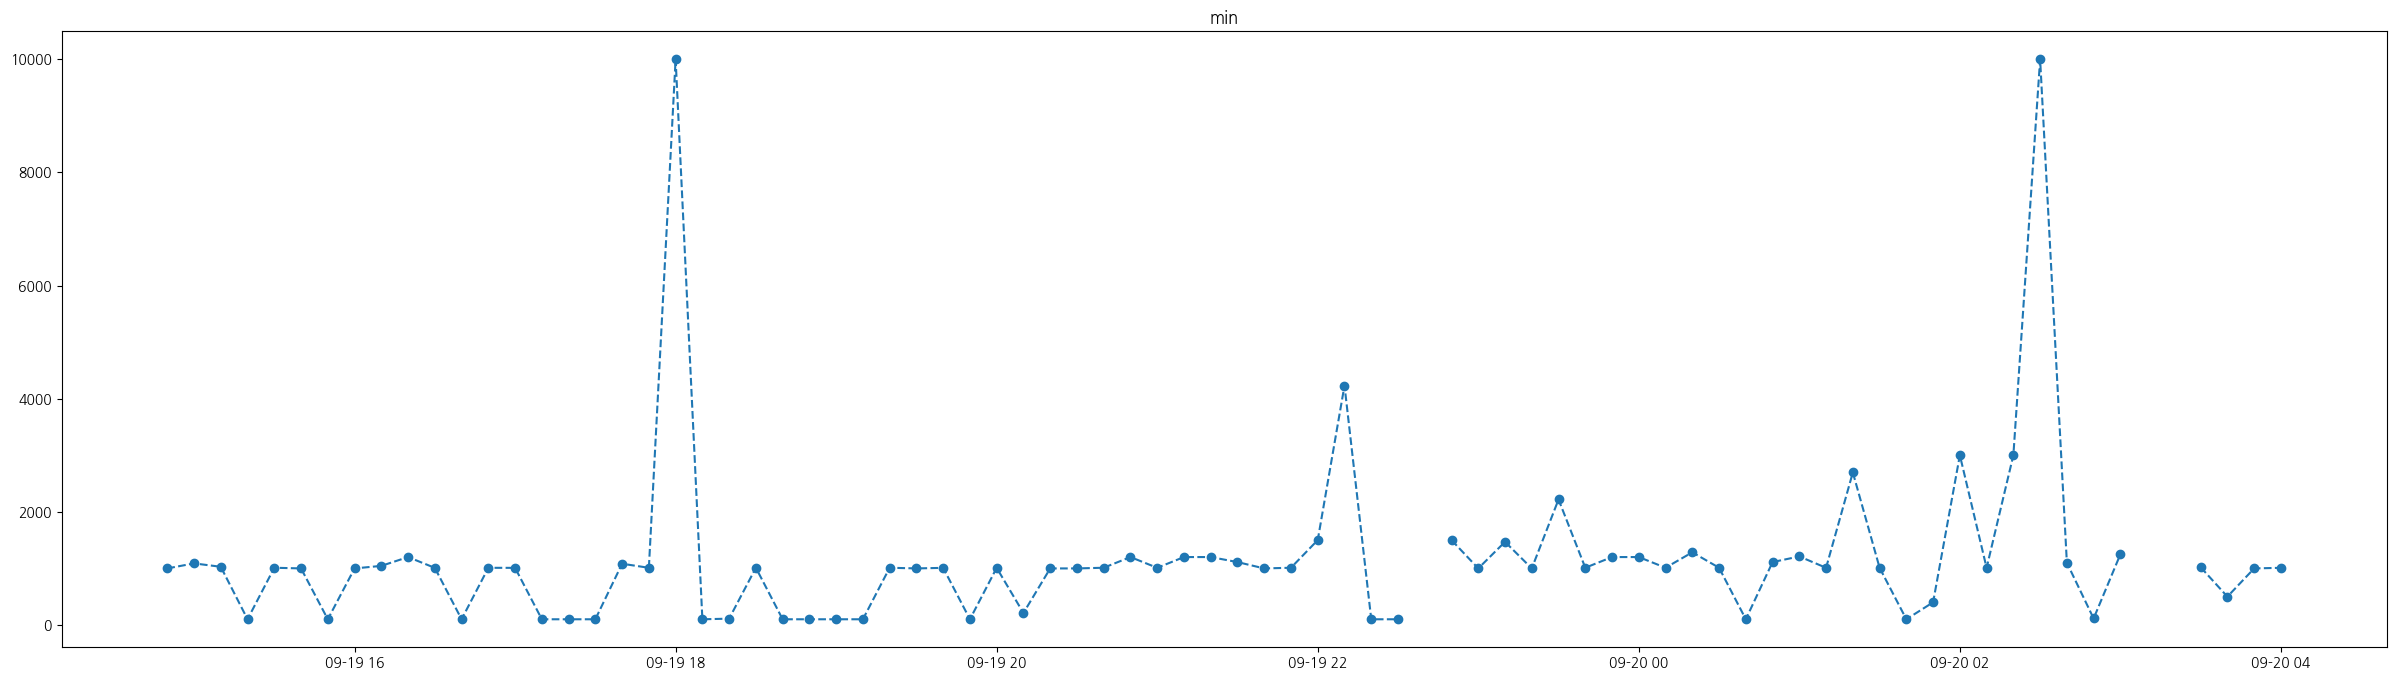

max


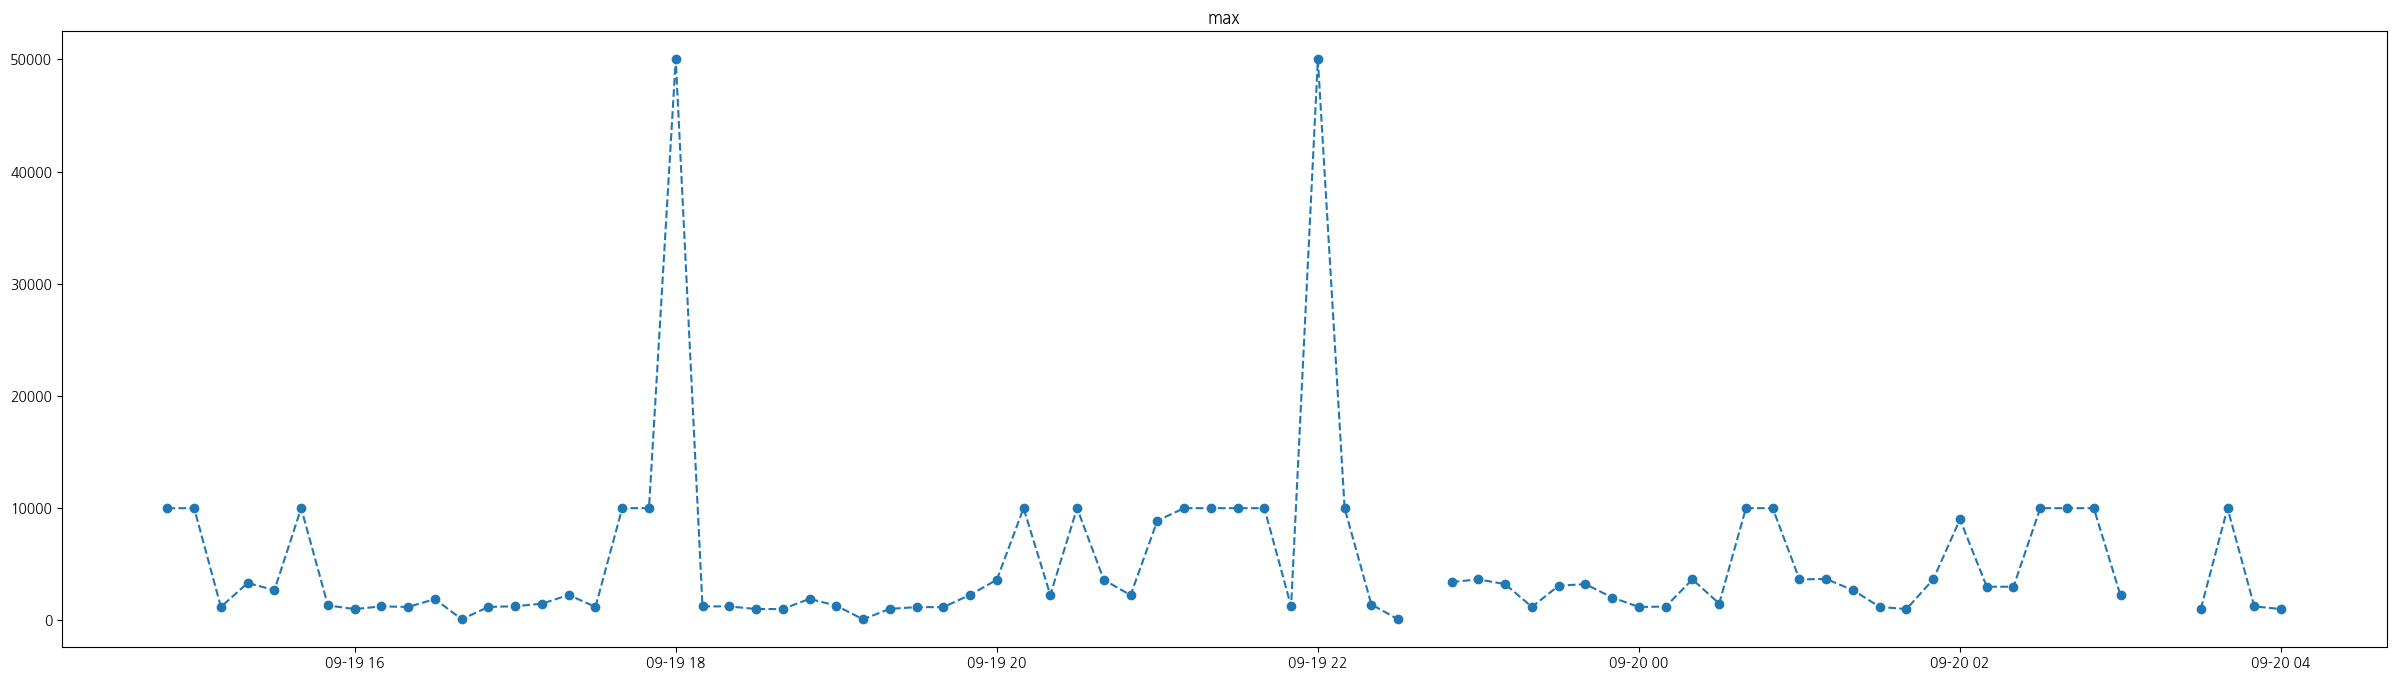

mean


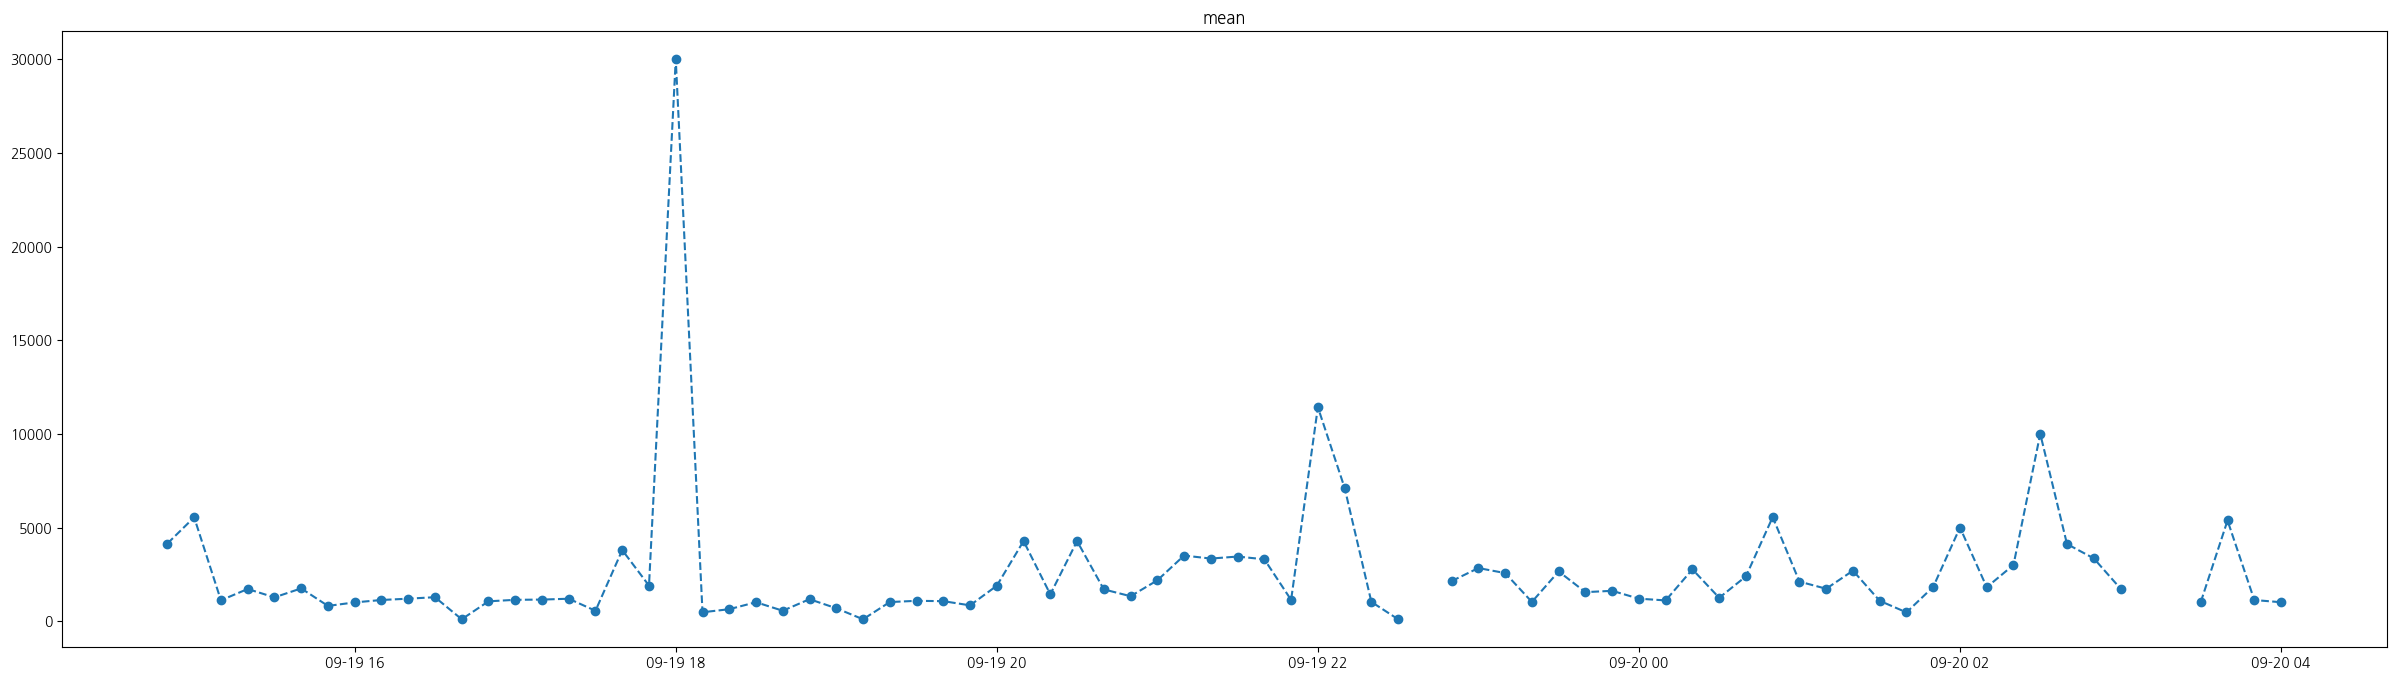

median


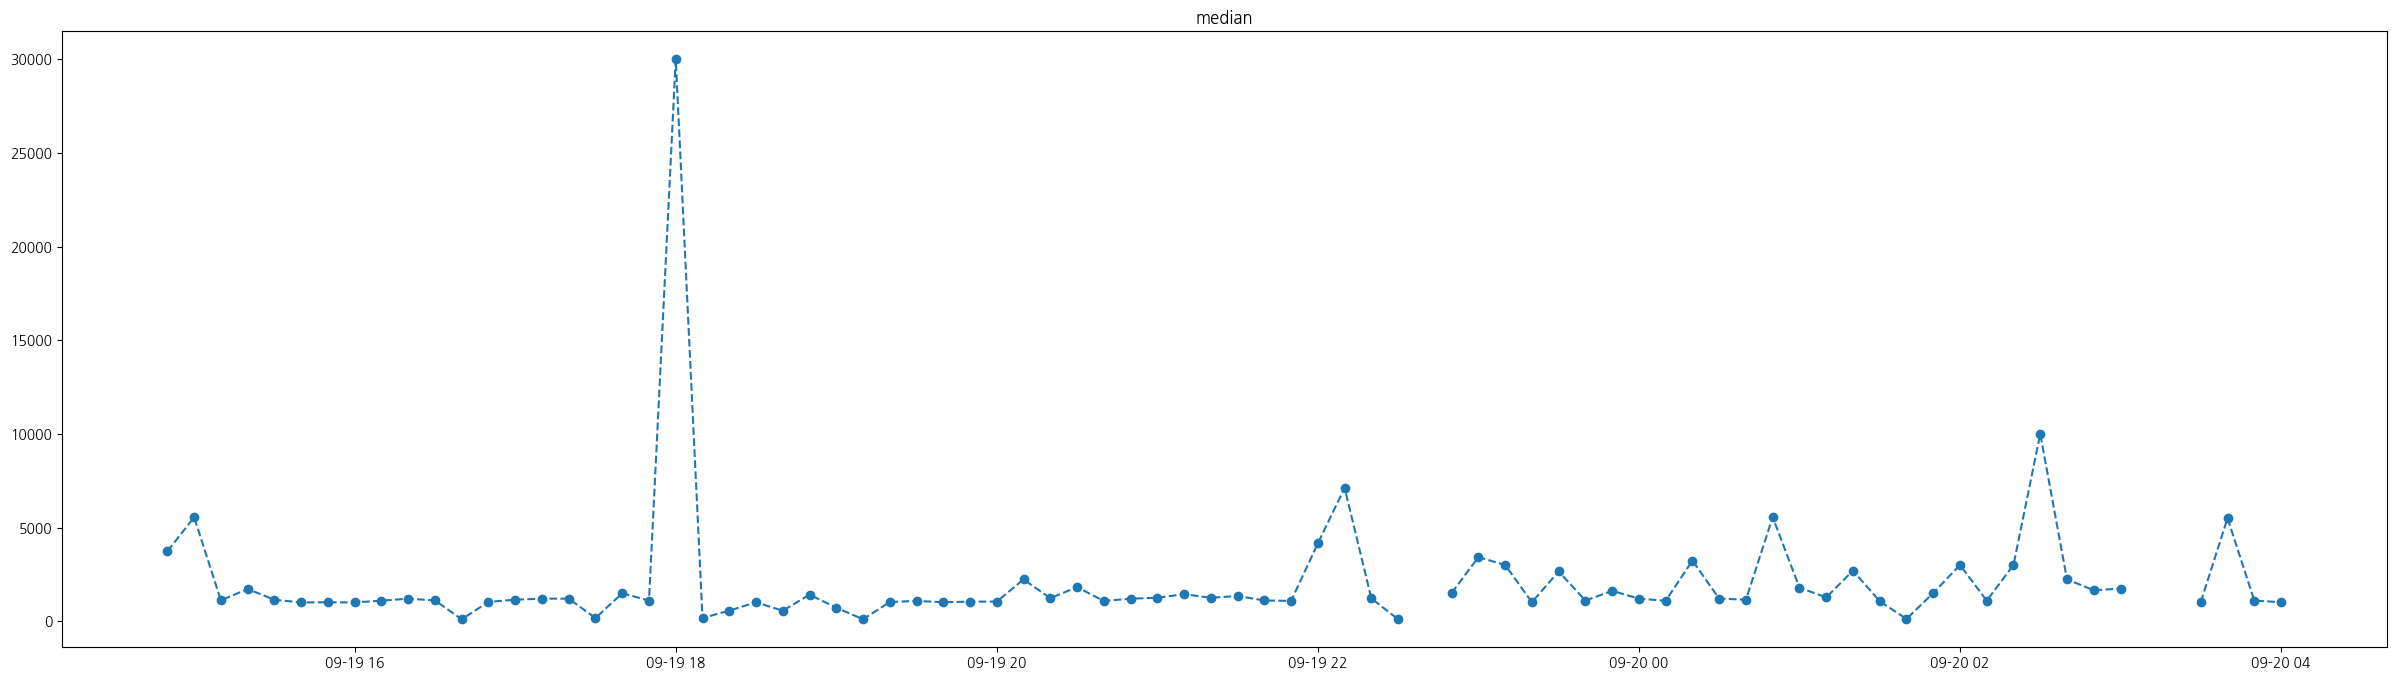

sum


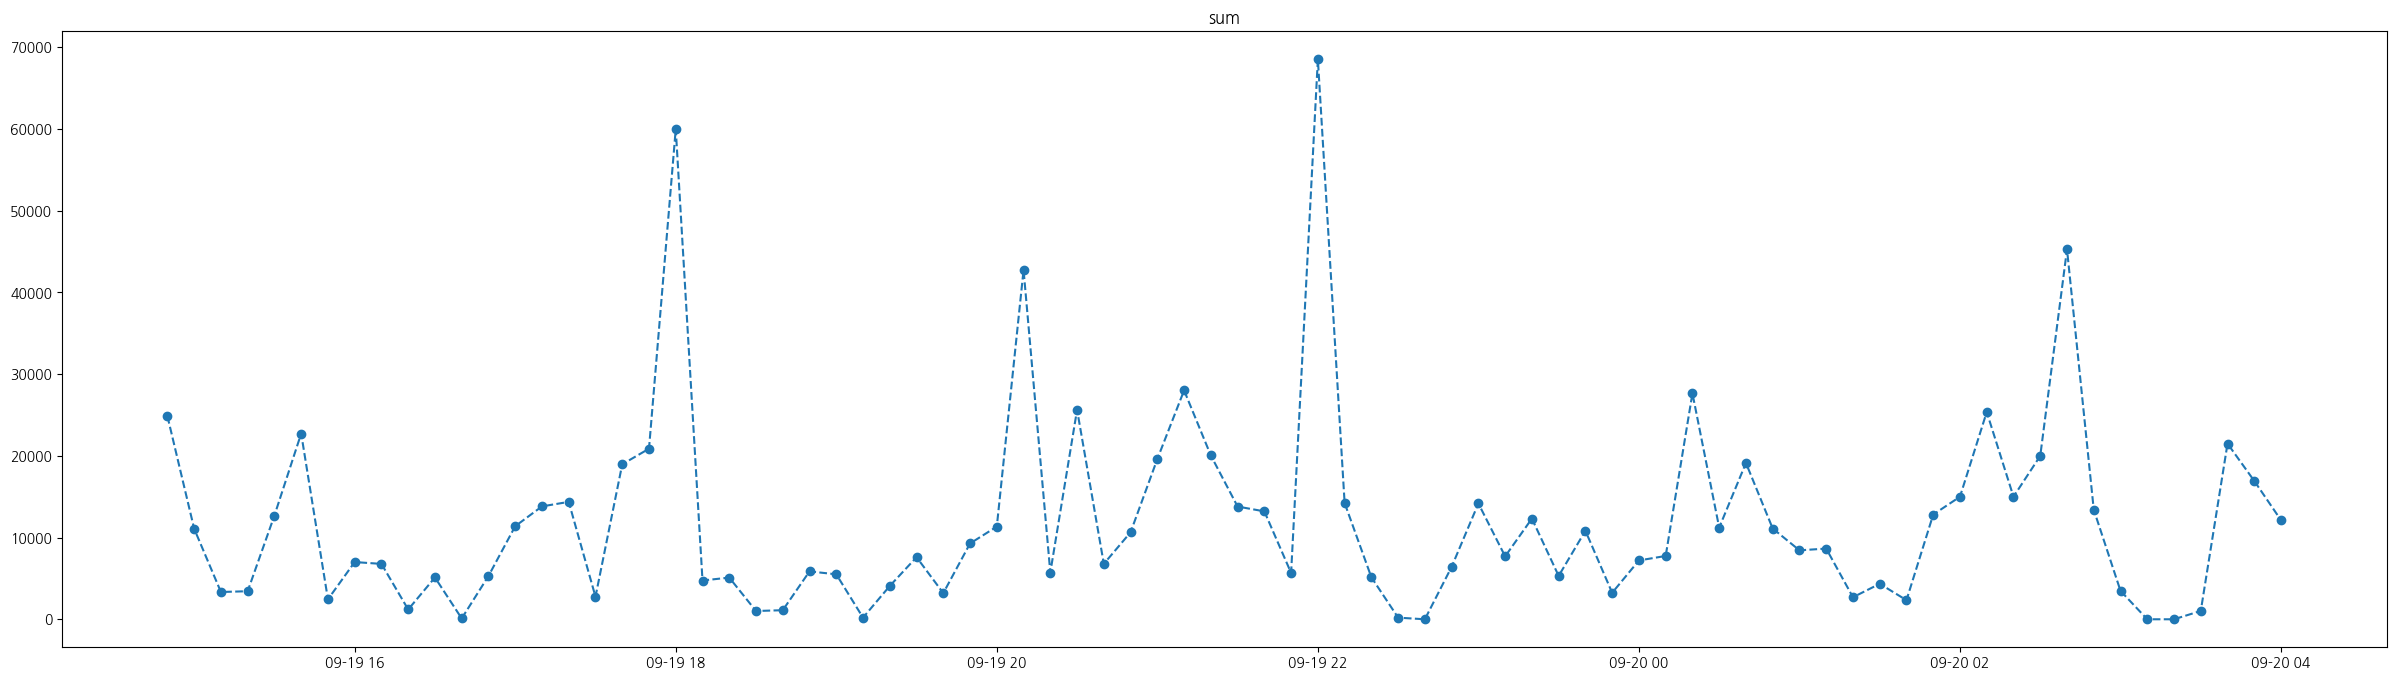

In [18]:
for i in list(df_10m.columns):
    print(i)
    plt.figure(figsize=(30,8))
    plt.plot(df_10m[i],linestyle='--',marker='o')
    plt.title(i)
    plt.show()